In [1]:
import pandas as pd

In [2]:
import argparse
import os
import shutil
import numpy as np
import pandas as pd
import numpy as np
import scipy.spatial.distance as ssd
import gc
import h5py
import itertools
import scipy.stats as stats
from scipy.io import mmread
from scipy import sparse, io
from scipy.sparse import csr_matrix, triu, coo_matrix
import numpy as np
#from hic_normalization import *
import sys

In [3]:
tissue_size = { 'Adipose_Subcutaneous' : 581,
              'Adipose_Visceral_Omentum' : 469,
                         'Adrenal_Gland' : 233,
                          'Artery_Aorta' : 387,
                       'Artery_Coronary' : 213,
                         'Artery_Tibial' : 584,
                        'Brain_Amygdala' : 129,
  'Brain_Anterior_cingulate_cortex_BA24' : 147,
           'Brain_Caudate_basal_ganglia' : 194,
           'Brain_Cerebellar_Hemisphere' : 175,
                      'Brain_Cerebellum' : 209,
                          'Brain_Cortex' : 205,
              'Brain_Frontal_Cortex_BA9' : 175,
                     'Brain_Hippocampus' : 165,
                    'Brain_Hypothalamus' : 170,
 'Brain_Nucleus_accumbens_basal_ganglia' : 202,
           'Brain_Putamen_basal_ganglia' : 170,
        'Brain_Spinal_cord_cervical_c-1' : 126,
                'Brain_Substantia_nigra' : 114,
                 'Breast_Mammary_Tissue' : 396,
            'Cells_Cultured_fibroblasts' : 581,
     'Cells_EBV-transformed_lymphocytes' : 147,
                         'Colon_Sigmoid' : 318,
                      'Colon_Transverse' : 368,
   'Esophagus_Gastroesophageal_Junction' : 330,
                      'Esophagus_Mucosa' : 497,
                  'Esophagus_Muscularis' : 465,
                'Heart_Atrial_Appendage' : 372,
                  'Heart_Left_Ventricle' : 386,
                         'Kidney_Cortex' : 73,
                                 'Liver' : 208,
                                  'Lung' : 515,
                  'Minor_Salivary_Gland' : 144,
                       'Muscle_Skeletal' : 706,
                          'Nerve_Tibial' : 532,
                                 'Ovary' : 167,
                              'Pancreas' : 305,
                             'Pituitary' : 237,
                              'Prostate' : 221,
       'Skin_Not_Sun_Exposed_Suprapubic' : 517,
            'Skin_Sun_Exposed_Lower_leg' : 605,
        'Small_Intestine_Terminal_Ileum' : 174,
                                'Spleen' : 227,
                               'Stomach' : 324,
                                'Testis' : 322,
                               'Thyroid' : 574,
                                'Uterus' : 129,
                                'Vagina' : 141,
                           'Whole_Blood' : 670 }

In [94]:
from lohia_utilities.calculate_auc import calc_auroc
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
networks_list = open(f"{base_folder}/hi_c_data_processing/software/SRA_network/SRA_study_agg.sh", "r")
fraction_list = []
fraction_random_list = []
fraction_diff_list = []
null_list = []
df_list = []
study = []
df_combine_list = []
all_chr_tis_auc = []
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
tissue_null_list_ = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt", "r")
tissue_null_list = []
for i in tissue_null_list_:
    tissue_null_list.append(i.split()[0])
tissue_null_list.reverse()
for networks_s in networks_list:
    for tissue_null in tissue_null_list:
        #chr_list = list(range(1,23)) + ['X']
        chr_list = list(range(17,18))
        chr_list = ['17']
        

        for chrom in chr_list:
            print (chrom)
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}_cn_90.hdf")
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/{tissue.split()[0]}.hdf")
            #sig_pairs['sample'] = 'sig'
            #null_var_1 = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_null_90.hdf")
            all_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_SRA_study_not_ranked_all.sh_{tissue_null}_tads.hdf")
            all_pairs['tissue'] = tissue_null.split('.')[0]
            all_pairs['tissue_size'] = tissue_size[tissue_null.split('.')[0]]
            all_pairs['tad_h_coarse'] = [1 if x >= 1 else 0 for x in all_pairs['tad_y'] ] 
            #all_pairs = all_pairs[all_pairs['tad_y'] > 0]
            #all_pairs = all_pairs[all_pairs['diff'] > 10]
            #sig_all = pd.concat([sig_pairs, all_pairs])
            #sig_all = sig_all.drop_duplicates(subset=['variant_id', 'gene_id'])
            #sig_all['diff'] = [0 if x <= 10 else 250 if x<=25 else 500 if x<=50 else 1000 for x in sig_all['diff'] ]
            df_combine_list.append(all_pairs)
        lt


17


NameError: name 'lt' is not defined

In [244]:
tissue_null_list.reverse()

In [95]:
df = pd.concat(df_combine_list)

In [29]:
reorder_list = all_pairs.drop_duplicates(['tissue'])['tissue'].to_list()

In [ ]:
df['tad_h_coarse'] = [1 if x >= 1 else 0 for x in df['tad_y'] ] 

In [86]:
df = df.drop_duplicates(['truth', 'variant_id', 'tissue'])

In [96]:
            d2 = df.groupby([ 'tissue', 'truth', 'diff'])['tad_h_coarse'].value_counts(normalize=True).rename('percentage').reset_index()
            #d2 = d2.reindex(reorder_list)
        

In [79]:
d2 = df.groupby([ 'tissue', 'truth', 'diff'])['tad_h_coarse'].value_counts(normalize=True).rename('percentage').reset_index()

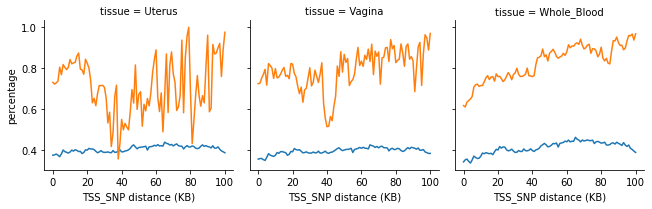

In [80]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
g = sns.FacetGrid(d2[d2['tad_h_coarse']==0], col='tissue', col_wrap=4, hue='truth')
#g.map(plt.axhline, y=200, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "percentage")
#g.add_legend()
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')

#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig1.pdf' 
#savefig('sample.pdf')
#plt.savefig(figname, bbox_inches='tight', dpi=300)

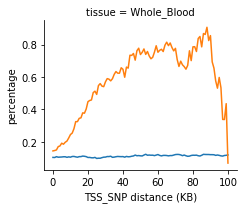

In [97]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
g = sns.FacetGrid(d2[d2['tad_h_coarse']==0], col='tissue', col_wrap=4, hue='truth')
#g.map(plt.axhline, y=200, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "percentage")
#g.add_legend()
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')

#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig1.pdf' 
#savefig('sample.pdf')
#plt.savefig(figname, bbox_inches='tight', dpi=300)

In [269]:
df['sum'] = df['tad_x'] + df['tad_y']

In [68]:
df['tad_h_coarse'] = [1 if x >= 1 else 0 for x in df['tad_y'] ] 

In [151]:
df['tad_h_coarse'] = [x if (y >= 1) else -1 for x,y in zip(df['tad_h'],df['sum'])] 

In [ ]:
df['tad_h_coarse'] = [x if (y >= 1) else -1 for x,y in zip(df['tad_h'],df['tad_y'])] 

In [192]:
df = df[df['chr'] == 'chr1']

In [271]:
dfsub = df[df['tad_y'] > 0]

In [116]:
dfsub = df[df['sum'] >= 1]

In [148]:
dfsub = df[df['tad_h_coarse'] >= 0]

In [278]:
d2 = dfsub.groupby(['truth', 'diff'])['tad_h_coarse'].value_counts(normalize=True).rename('percentage').reset_index()



In [276]:
d2 = df.groupby(['truth'])['tad_h'].value_counts(normalize=True).rename('percentage').reset_index()

In [105]:
d2

truth  tad_h_coarse  percentage
0      0             1    0.534185
1      0             0    0.465815
2      1             1    0.867207
3      1             0    0.132793

In [30]:
d3 = dfsub[dfsub['diff'] == 0]

In [32]:
d3[d3['tad_h'] == 0]

Empty DataFrame
Columns: [gene_id, variant_id, tss_distance, ma_samples, ma_count, maf, pval_nominal, slope, slope_se, chr, tss_var, tss, tss_bin, tss_var_bin, diff, tad_h, tad_x, tad_y, variant_id_gene_id, truth, tad_h_coarse, sum]
Index: []

[0 rows x 22 columns]

In [11]:
d2['diff'] = d2['diff'] / 10

In [293]:
top_variants = list(set(df[df['truth']==1]['variant_id'].tolist()))

In [299]:
df = df.set_index('variant_id')

In [300]:
df_exp_subset = df.loc[top_variants, :] 

In [296]:
df['include'] = [1 if x in top_variants else 0 for x in df['variant_id']]

KeyboardInterrupt: 

In [12]:

d2['diff'] = d2['diff'].astype('int')

In [317]:
df['tad_h_coarse'] = [1 if x > 1 else 0 for x in df['tad_h'] ] 

In [324]:
d2 = df_exp_subset[df_exp_subset['tad_h_coarse']==1].groupby(['truth', 'diff'])['tad_h_coarse'].value_counts(normalize=True).rename('percentage').reset_index()



In [28]:
d2['percentage'].max()

0.9375213383407306

In [172]:
import seaborn as sns
sns.barplot(data=d2[d2['tad_h_coarse']==1], x='diff', y ='percentage', hue='truth')

ValueError: min() arg is an empty sequence

<AxesSubplot:xlabel='diff', ylabel='percentage'>

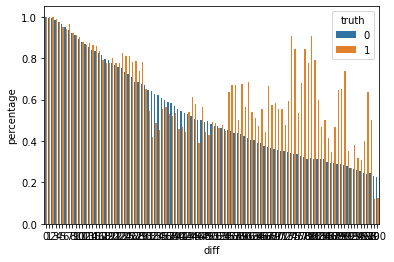

In [168]:
sns.barplot(data=d2[d2['tad_h_coarse']==1], x='diff', y ='percentage', hue='truth')

<AxesSubplot:xlabel='diff', ylabel='percentage'>

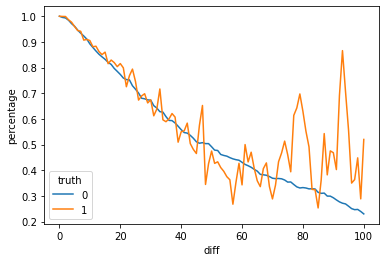

In [26]:
import seaborn as sns
sns.lineplot(data=d2[d2['tad_h_coarse']==1], x='diff', y ='percentage', hue='truth')

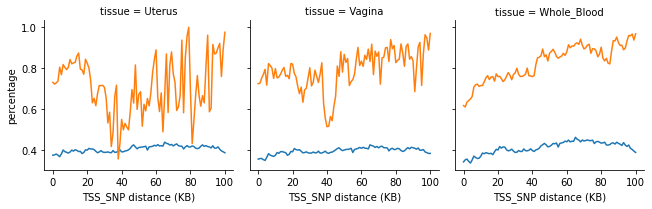

In [77]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
g = sns.FacetGrid(d2[d2['tad_h_coarse']==0], col='tissue', col_wrap=4, hue='truth')
#g.map(plt.axhline, y=200, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "percentage")
#g.add_legend()
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')

#figname = '/sonas-hs/gillis/hpc/data/lohia/figures/fig1.pdf' 
#savefig('sample.pdf')
#plt.savefig(figname, bbox_inches='tight', dpi=300)

In [73]:
d2[d2['tad_h_coarse']==0]['percentage'].max()

0.9699248120300752

In [36]:
reorder_list = ['Uterus' ,'Vagina' , 'Ram','Whole_Blood']

In [176]:
d2['tad_h_coarse'].shape[0]

202

In [162]:
sns.barplot(data=d2[d2['tad_h_coarse']==-1], x='diff', y ='percentage', hue='truth')

ValueError: min() arg is an empty sequence

<AxesSubplot:xlabel='tad_h', ylabel='percentage'>

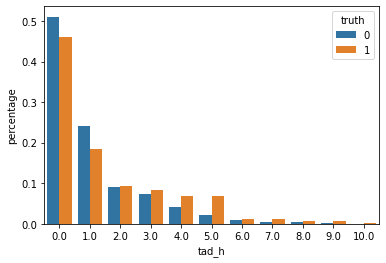

In [277]:
sns.barplot(data=d2, x='tad_h', y ='percentage', hue='truth')

<AxesSubplot:xlabel='tad_h', ylabel='percentage'>

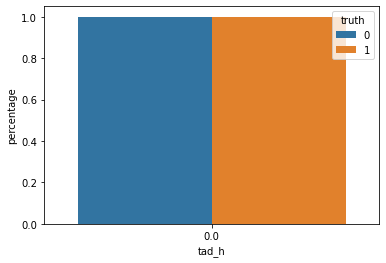

In [123]:
sns.barplot(data=d2, x='tad_h', y ='percentage', hue='truth')

<AxesSubplot:xlabel='tad_h', ylabel='percentage'>

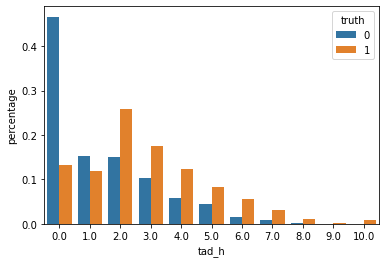

In [109]:
sns.barplot(data=d2, x='tad_h', y ='percentage', hue='truth')

<AxesSubplot:xlabel='tad_h_coarse', ylabel='percentage'>

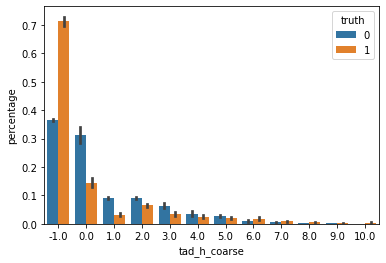

In [73]:
sns.barplot(data=d2, x='tad_h_coarse', y ='percentage', hue='truth')

In [197]:
import argparse
import os
import shutil
import numpy as np
import pandas as pd
import numpy as np
import scipy.spatial.distance as ssd
import gc
import h5py
import itertools
import scipy.stats as stats
from scipy.io import mmread
from scipy import sparse, io
from scipy.sparse import csr_matrix, triu, coo_matrix
import numpy as np
#from hic_normalization import *
import sys

base_folder = '/sonas-hs/gillis/hpc/data/lohia'
study_id = 'SRA_study_not_ranked_all.sh'
input_network_norm_type = 'VC_rank'
resoulution_in_kb = 10
chrom = 'chr6'


rank_n_tmp  = sparse.load_npz(f"{base_folder}/hi_c_data_processing/data/{study_id}_{resoulution_in_kb}KB/normalized_and_mapped/{chrom}_tss_tss_{resoulution_in_kb}_{input_network_norm_type}_entire_genes_{study_id}.npz")

rank_n  = sparse.csr_matrix.transpose(rank_n_tmp) + sparse.triu(rank_n_tmp, k=1, format='csr')


KeyboardInterrupt: 

In [173]:
rank_n 

<17081x17081 sparse matrix of type '<class 'numpy.float32'>'
	with 291743480 stored elements in Compressed Sparse Column format>

In [172]:
sns.heatmap(rank_n.toarray())

<AxesSubplot:>

Error in callback <function flush_figures at 0x7fcc0e76e430> (for post_execute):


KeyboardInterrupt: 

In [53]:
rank_n.setdiag(0, k=0)

In [54]:
            gene_folder = "hi_c_data_processing/software/gene_tx_map"
            gene_file = "gencodev32_hg38_known_gene_%s_order.tsv" %chrom
            gene_data = pd.read_csv("%s/%s/%s" %(base_folder, gene_folder, gene_file), sep='\t',
                                            header=0, index_col=None)
            gene_data.set_index('Gene stable ID', inplace=True)

            tss = gene_data['txStart_outer'].to_list()
            tes = gene_data['txEnd_outer'].to_list()
            gene_name = gene_data.index.to_list()
            gene_len = len(tes)

            gene_x = []
            gene_y = []
            index_range_x = []
            index_range_y = []
            index_x = []
            index_y = []
            bin_dist_list = []
            
            counter = 0
            for tss_x, tes_x, gene_a in zip(tss, tes, gene_name):
                counter = counter + 1
                #print (counter)
                if counter <= gene_len:
                    row_num_tss = [int(tss_x/(resoulution_in_kb*1000))]
                    row_num_tes = [int(tes_x/(resoulution_in_kb*1000))]
                    row_num_range = list(range(min(row_num_tss[0],row_num_tes[0]), max(row_num_tss[0],row_num_tes[0])+1))
                    

            
                    for tss_y, tes_y, gene_b in zip(tss[counter::], tes[counter::], gene_name[counter::]):
                        index_range_x.append(row_num_range)
                        index_x.append(row_num_tss[0])

                        col_num_tss = [int(tss_y/(resoulution_in_kb*1000))]
                        col_num_tes = [int(tes_y/(resoulution_in_kb*1000))]

                        #row_num_range = [range(min(i,j), max(i,j)+1) for i,j in zip(row_num_tss, row_num_tes)]

                        col_num_range = list(range(min(col_num_tss[0],col_num_tes[0]), max(col_num_tss[0],col_num_tes[0])+1))

                        gene_x.append(gene_a)
                        gene_y.append(gene_b)
                        index_range_y.append(col_num_range)
                        index_y.append(col_num_tss[0])
                        bin_dist_list.append(row_num_tss[0] - col_num_tss[0])

                else:
                    break


            print ("1type")

1type


In [55]:
            all_genes_index = list(set(index_x))
            #arr = np.where(rank_n.toarray() < thresh, 0, 1)
            
            rank_n = rank_n[:, all_genes_index ]
            #jac_sim = 1 - pairwise_distances(arr, metric = "hamming")

In [56]:
thresh = np.percentile(rank_n.toarray(), 90)

In [193]:
thresh (21)

NameError: name 'thresh' is not defined

In [57]:
thresh

23056.0

In [59]:
df_2_or = pd.read_hdf('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data/SRA_study_agg.sh_10KB/normalized_and_mapped/long_form_network_and_exp/combined_dist_10_SRA_study_agg.sh_entire_genes.h5')


In [60]:
df_2_or

tss_tss  exp  tes_tes    VC_tss  VC_rank_tss Gene stable ID_x  \
0           22579  NaN    48265   80136.5        389.0  ENSG00000228572   
1           65077  NaN    49437  111092.0        403.5  ENSG00000228572   
2           42498  NaN     1172   96109.0        401.0  ENSG00000182378   
3           67247  NaN    66760  118420.0        410.5  ENSG00000228572   
4           44668  NaN    18495  103624.5        403.0  ENSG00000182378   
...           ...  ...      ...       ...          ...              ...   
14968651    98371  NaN    87526  517058.0       6168.0  ENSG00000171161   
14968652    77436  NaN    87038  361346.0       3940.0  ENSG00000171163   
14968653    77417  NaN    72247  361346.0       3940.0  ENSG00000227237   
14968654    23785  NaN    24354  417057.0       4264.0  ENSG00000200495   
14968655    30385  NaN    17097  377340.0       3984.0  ENSG00000185220   

         Gene stable ID_y  
0         ENSG00000182378  
1         ENSG00000178605  
2         ENSG00000178605  
3         ENSG00000226179  
4         ENSG00000226179  
...                   ...  
14968651  ENSG00000233084  
14968652  ENSG00000233084  
14968653  ENSG00000233084  
14968654  ENSG00000233084  
14968655  ENSG00000233084  

[89354706 rows x 7 columns]

In [ ]:
np.percentile(df_2_or['VC_rank_tss'], 90)

In [62]:
df_2_or['VC_rank_tss'].fillna(0, inplace = True)

In [38]:
base_folder = '/sonas-hs/gillis/hpc/data/lohia'
y = pd.read_hdf(f'{base_folder}/hi_c_data_processing/data/SRA_study_agg.sh_10KB/normalized_and_mapped/long_form_network_and_exp/toplogy/network_VC_rank_tss_chr6_resolution10_hic_percentile90_SRA_study_agg.sh_entire_genes.h5')


In [176]:
from lohia_utilities.calculate_auc import calc_auroc
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
networks_list = open(f"{base_folder}/hi_c_data_processing/software/SRA_network/SRA_study_agg.sh", "r")
fraction_list = []
fraction_random_list = []
fraction_diff_list = []
null_list = []
df_list = []
study = []
df_combine_list = []
all_chr_tis_auc = []
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
tissue_null_list = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL_all_associations/tissue.txt", "r")
for networks_s in networks_list:
    for tissue, tissue_null in zip(tissue_list_sig, tissue_null_list):
        #chr_list = list(range(1,23)) + ['X']
        #chr_list = list(range(1,11))
        chr_list = ['6']
        
        sig_pairs = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/{tissue.split()[0]}", sep='\t')
        sig_pairs['gene_id'] = sig_pairs['gene_id'].str.split('.', expand=True)[0]
        sig_pairs['variant_id_gene_id'] = sig_pairs['variant_id'] + sig_pairs['gene_id']
        set_sig = set(sig_pairs['variant_id_gene_id'].tolist()) 
        for chrom in chr_list:
            print (chrom)
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}_cn_90.hdf")
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/{tissue.split()[0]}.hdf")
            #sig_pairs['sample'] = 'sig'
            #null_var_1 = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_null_90.hdf")
            all_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue_null.split()[0]}_cn_90_subset_jaccard.hdf")
            all_pairs['sample'] = 'null'
            all_pairs['gene_id'] = all_pairs['gene_id'].str.split('.', expand=True)[0]
            all_pairs['variant_id_gene_id'] = all_pairs['variant_id'] + all_pairs['gene_id']
            all_pairs['truth'] = [1 if x in set_sig else 0 for x in all_pairs['variant_id_gene_id']]
            #all_pairs = all_pairs[all_pairs['diff'] > 10]
            #sig_all = pd.concat([sig_pairs, all_pairs])
            #sig_all = sig_all.drop_duplicates(subset=['variant_id', 'gene_id'])
            #sig_all['diff'] = [0 if x <= 10 else 250 if x<=25 else 500 if x<=50 else 1000 for x in sig_all['diff'] ]
            df_combine_list.append(all_pairs)
            lt
            print (tissue.split()[0])  
            #df2 = pd.concat(df_combine_list)
            #for given_chr in  df_combine_list:    
            for given_chr in  [all_pairs]:
              auc_list_tss = []
              auc_list_cn = []
              diff_list = []
              chr_given = []
              tissue_given = []
              
              
              grouped_gene_id = given_chr.groupby(['diff'])
              for gene_id in grouped_gene_id.groups.keys():
                  df_gene = grouped_gene_id.get_group(gene_id)
                  diff_list.append(gene_id)
                  #print (df_gene)
                  #df_gene.dropna(subset=['exp'], inplace=True) 
                  #print (df_gene.shape)
                  
                  pval_upper = df_gene['pval_nominal'].min()
                  #print (exp_upper)
                  #exp_lower = np.percentile(df_2_or[['exp']], 50)
                  
                  df = pd.DataFrame(columns = ['predicted_score', 'true_pos', 'true_neg'])   

                  #paired_df['exp_label'] = [1.0 if x > exp_upper else 0.0 if x < exp_lower else np.nan for x in paired_df['exp']]
                      
                  df['predicted_score'] = df_gene['hi-c'].tolist()
                  #df['predicted_score'] = df_gene['tss_distance'].tolist()
                  #df['predicted_score'] = 1/df['predicted_score']
                  #df['predicted_score'] = df['predicted_score'].abs()
                  #df['true_pos'] = [1 if ((x== pval_upper) and (y==1)) else 0 for x,y in zip(df_gene['pval_nominal'], df_gene['truth'])]
                  df['true_pos'] = df_gene['truth'].tolist()
                  #print (len(df['true_pos'].to_list()))
                  df['true_neg'] = [0 if x==1 else 1 for x in df['true_pos']]
                  #print (calc_auroc(df,predicted_score='predicted_score'))
                  calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                  auc_list_tss.append(calculated_auc)
                  df['predicted_score'] = df_gene['c_n'].tolist()
                  calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                  auc_list_cn.append(calculated_auc)
                  chr_given.append(chrom)
                  tissue_given.append(tissue_null.split()[0])
            df_auc = pd.DataFrame(list(zip(auc_list_tss, auc_list_cn, diff_list, chr_given, tissue_given)),
            columns =['hi-c_auc', 'cn_auc', 'diff', 'chr', 'tissue'])
            df_auc['type_sim'] = "jaccard"
            all_chr_tis_auc.append(df_auc)
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}_cn_90.hdf")
            #sig_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/{tissue.split()[0]}.hdf")
            #sig_pairs['sample'] = 'sig'
            #null_var_1 = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_null_90.hdf")
            all_pairs = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/all_pairs_3/chr{chrom}_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue_null.split()[0]}_cn_90_subset_hamming.hdf")
            all_pairs['sample'] = 'null'
            all_pairs['gene_id'] = all_pairs['gene_id'].str.split('.', expand=True)[0]
            all_pairs['variant_id_gene_id'] = all_pairs['variant_id'] + all_pairs['gene_id']
            all_pairs['truth'] = [1 if x in set_sig else 0 for x in all_pairs['variant_id_gene_id']]
            #all_pairs = all_pairs[all_pairs['diff'] > 10]
            #sig_all = pd.concat([sig_pairs, all_pairs])
            #sig_all = sig_all.drop_duplicates(subset=['variant_id', 'gene_id'])
            #sig_all['diff'] = [0 if x <= 10 else 250 if x<=25 else 500 if x<=50 else 1000 for x in sig_all['diff'] ]
            #df_combine_list.append(all_pairs)
            print (tissue.split()[0])  
            #df2 = pd.concat(df_combine_list)
            #for given_chr in  df_combine_list:    
            for given_chr in  [all_pairs]:
              auc_list_tss = []
              auc_list_cn = []
              diff_list = []
              chr_given = []
              tissue_given = []
              
              
              
              
              grouped_gene_id = given_chr.groupby(['diff'])
              for gene_id in grouped_gene_id.groups.keys():
                  df_gene = grouped_gene_id.get_group(gene_id)
                  diff_list.append(gene_id)
                  #print (df_gene)
                  #df_gene.dropna(subset=['exp'], inplace=True) 
                  #print (df_gene.shape)
                  
                  pval_upper = df_gene['pval_nominal'].min()
                  #print (exp_upper)
                  #exp_lower = np.percentile(df_2_or[['exp']], 50)
                  
                  df = pd.DataFrame(columns = ['predicted_score', 'true_pos', 'true_neg'])   

                  #paired_df['exp_label'] = [1.0 if x > exp_upper else 0.0 if x < exp_lower else np.nan for x in paired_df['exp']]
                      
                  df['predicted_score'] = df_gene['hi-c'].tolist()
                  #df['predicted_score'] = df_gene['tss_distance'].tolist()
                  #df['predicted_score'] = 1/df['predicted_score']
                  #df['predicted_score'] = df['predicted_score'].abs()
                  #df['true_pos'] = [1 if ((x== pval_upper) and (y==1)) else 0 for x,y in zip(df_gene['pval_nominal'], df_gene['truth'])]
                  df['true_pos'] = df_gene['truth'].tolist()
                  #print (len(df['true_pos'].to_list()))
                  df['true_neg'] = [0 if x==1 else 1 for x in df['true_pos']]
                  #print (calc_auroc(df,predicted_score='predicted_score'))
                  calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                  auc_list_tss.append(calculated_auc)
                  df['predicted_score'] = df_gene['c_n'].tolist()
                  calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                  auc_list_cn.append(calculated_auc)
                  chr_given.append(chrom)
                  tissue_given.append(tissue_null.split()[0])
                  
              df_auc = pd.DataFrame(list(zip(auc_list_tss, auc_list_cn, diff_list, chr_given, tissue_given)),
              columns =['hi-c_auc', 'cn_auc', 'diff', 'chr', 'tissue'])
              df_auc['type_sim'] = "hamming"
              all_chr_tis_auc.append(df_auc)
                    
              #sns.scatterplot(diff_list, auc_list_cn)
              #sns.scatterplot(diff_list, auc_list_tss)

6


NameError: name 'lt' is not defined

In [177]:
df = pd.concat(df_combine_list)

<AxesSubplot:xlabel='truth', ylabel='hi-c'>

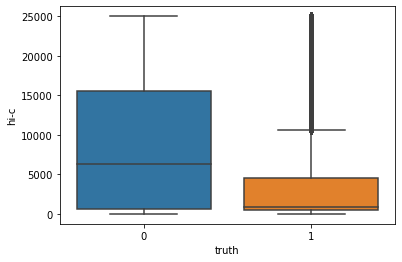

In [180]:
sns.boxplot(data=df, x='truth', y='hi-c')

In [137]:
y = pd.read_hdf(f'{base_folder}/eQTL/all_pairs_3/sig_pairs_count_single.hdf')

In [253]:
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
auc_each_tissue = []
for tissue in tissue_list_sig:
    try:
        simlarity_type = "jaccard" 
        t = pd.read_hdf(f'{base_folder}/eQTL/all_pairs_3/{tissue.split()[0]}_90_chr_auc_{simlarity_type}.hdf')
        #print (t)
        t['tissue'] = tissue.split()[0].split('.')[0]
        t['samples'] = t['tp'] + t['tn']
        t['tissue_size'] = tissue_size[tissue.split()[0].split('.')[0]]
        auc_each_tissue.append(t)
    except FileNotFoundError:
        pass

In [46]:
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
auc_each_tissue = []
for tissue in tissue_list_sig:
    try:
        simlarity_type = "jaccard"
        t = pd.read_csv(f'{base_folder}/eQTL/all_pairs_3/{tissue.split()[0]}_90_auc_allchr{simlarity_type}.txt', sep= '\t', names=['auc_hic', 'auc_cn', 'tp', 'tn', 'diff'])
        t['tissue'] = tissue.split()[0].split('.')[0]
        t['samples'] = t['tp'] + t['tn']
        t['tissue_size'] = tissue_size[tissue.split()[0].split('.')[0]]
        auc_each_tissue.append(t)
    except FileNotFoundError:
        pass

In [215]:
tissue_size = { 'Adipose_Subcutaneous' : 581,
              'Adipose_Visceral_Omentum' : 469,
                         'Adrenal_Gland' : 233,
                          'Artery_Aorta' : 387,
                       'Artery_Coronary' : 213,
                         'Artery_Tibial' : 584,
                        'Brain_Amygdala' : 129,
  'Brain_Anterior_cingulate_cortex_BA24' : 147,
           'Brain_Caudate_basal_ganglia' : 194,
           'Brain_Cerebellar_Hemisphere' : 175,
                      'Brain_Cerebellum' : 209,
                          'Brain_Cortex' : 205,
              'Brain_Frontal_Cortex_BA9' : 175,
                     'Brain_Hippocampus' : 165,
                    'Brain_Hypothalamus' : 170,
 'Brain_Nucleus_accumbens_basal_ganglia' : 202,
           'Brain_Putamen_basal_ganglia' : 170,
        'Brain_Spinal_cord_cervical_c-1' : 126,
                'Brain_Substantia_nigra' : 114,
                 'Breast_Mammary_Tissue' : 396,
            'Cells_Cultured_fibroblasts' : 581,
     'Cells_EBV-transformed_lymphocytes' : 147,
                         'Colon_Sigmoid' : 318,
                      'Colon_Transverse' : 368,
   'Esophagus_Gastroesophageal_Junction' : 330,
                      'Esophagus_Mucosa' : 497,
                  'Esophagus_Muscularis' : 465,
                'Heart_Atrial_Appendage' : 372,
                  'Heart_Left_Ventricle' : 386,
                         'Kidney_Cortex' : 73,
                                 'Liver' : 208,
                                  'Lung' : 515,
                  'Minor_Salivary_Gland' : 144,
                       'Muscle_Skeletal' : 706,
                          'Nerve_Tibial' : 532,
                                 'Ovary' : 167,
                              'Pancreas' : 305,
                             'Pituitary' : 237,
                              'Prostate' : 221,
       'Skin_Not_Sun_Exposed_Suprapubic' : 517,
            'Skin_Sun_Exposed_Lower_leg' : 605,
        'Small_Intestine_Terminal_Ileum' : 174,
                                'Spleen' : 227,
                               'Stomach' : 324,
                                'Testis' : 322,
                               'Thyroid' : 574,
                                'Uterus' : 129,
                                'Vagina' : 141,
                           'Whole_Blood' : 670 }

In [47]:
auc_each_tissue = pd.concat(auc_each_tissue)

In [48]:
auc_each_tissue.sort_values(by='tissue_size', ascending=False, inplace=True)

In [ ]:
auc_each_tissue.groupby([])

In [114]:
y['diff'] = y['diff'].astype('int')

In [116]:
z = y.groupby(['diff', 'chr'])['variant_id'].count().reset_index()


AttributeError: 'FacetGrid' object has no attribute 'set_ylim'

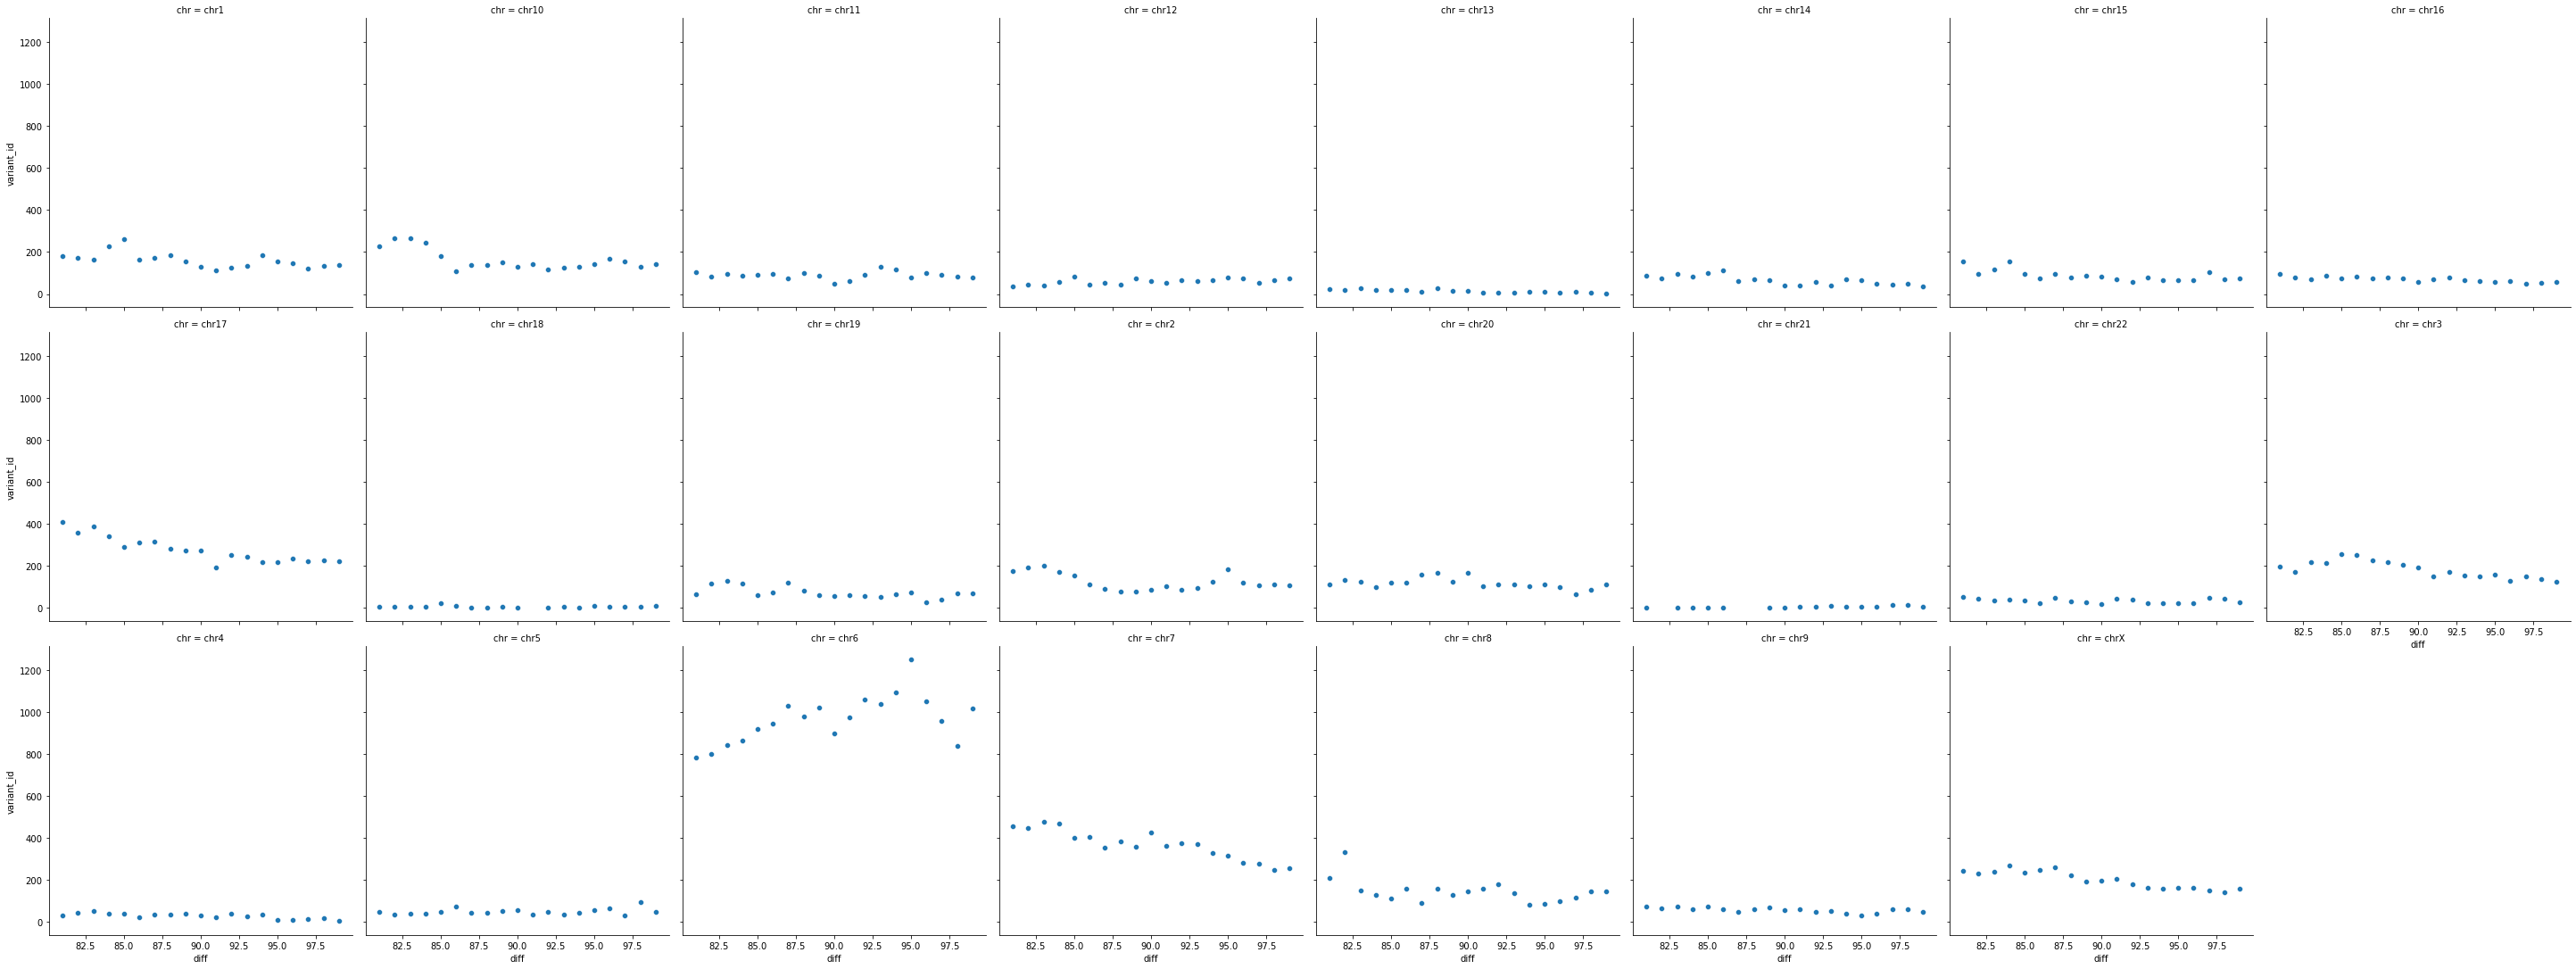

In [97]:
import matplotlib.pyplot as plt
ax = sns.relplot(data=z[z['diff']>80], y='variant_id', x='diff', col='chr', kind='scatter', col_wrap=8)
ax.set_ylim([0,100])
#plt.axhline(0.5)

g = sns.FacetGrid(z[z['diff']>80], col='chr', col_wrap=8)
g.map(plt.axhline, y=50, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.scatterplot, "diff", "variant_id")

In [110]:
y['diff_coarse'] = [ '0' if x<50 else '<60' if x<60 else '<70' if x<70 else '100' for x in  y['diff']]

In [102]:
z

diff    chr  variant_id diff_coarse
0        0   chr1        8623         <50
1        0  chr10        6103         <50
2        0  chr11        7252         <50
3        0  chr12        6962         <50
4        0  chr13        3177         <50
...    ...    ...         ...         ...
2290    99   chr6        1019         100
2291    99   chr7         257         100
2292    99   chr8         148         100
2293    99   chr9          48         100
2294    99   chrX         160         100

[2295 rows x 4 columns]

In [146]:
y['tissue'] = [x.split('.')[0] for x in y['tissue']]

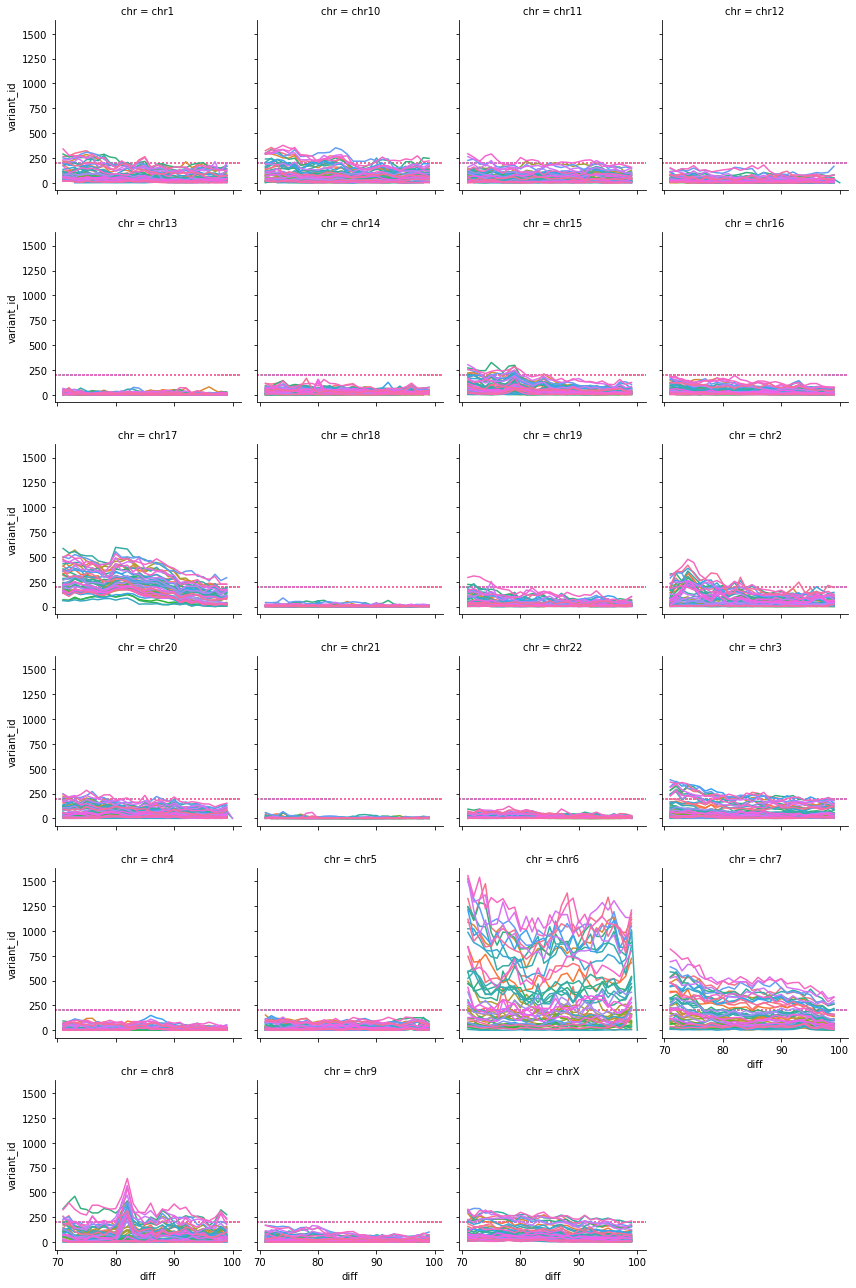

In [149]:
g = sns.FacetGrid(y[y['diff']>70], hue='tissue', col_wrap=4, col='chr')
g.map(plt.axhline, y=200, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "variant_id")
#g.add_legend()

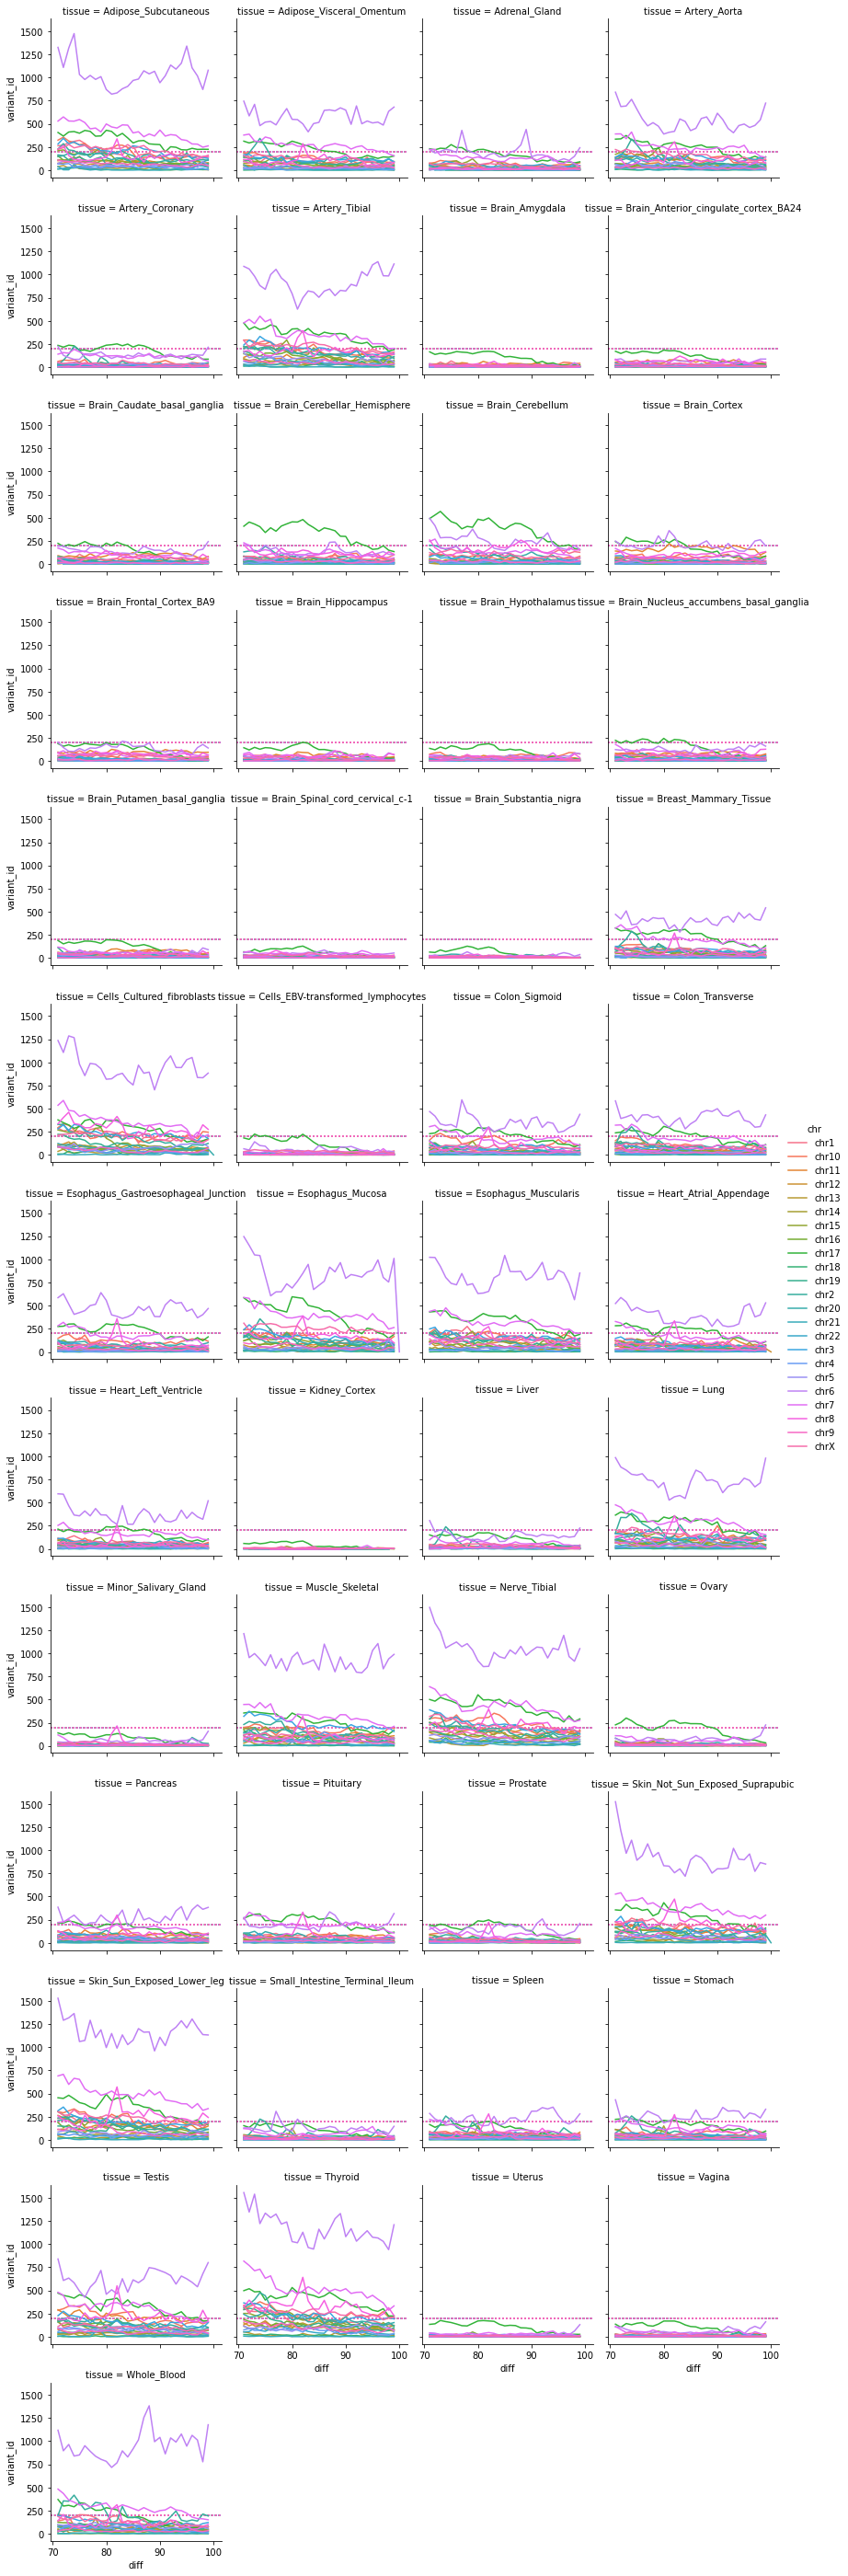

In [148]:
g = sns.FacetGrid(y[y['diff']>70], col='tissue', col_wrap=4, hue='chr')
g.map(plt.axhline, y=200, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "variant_id")
g.add_legend()

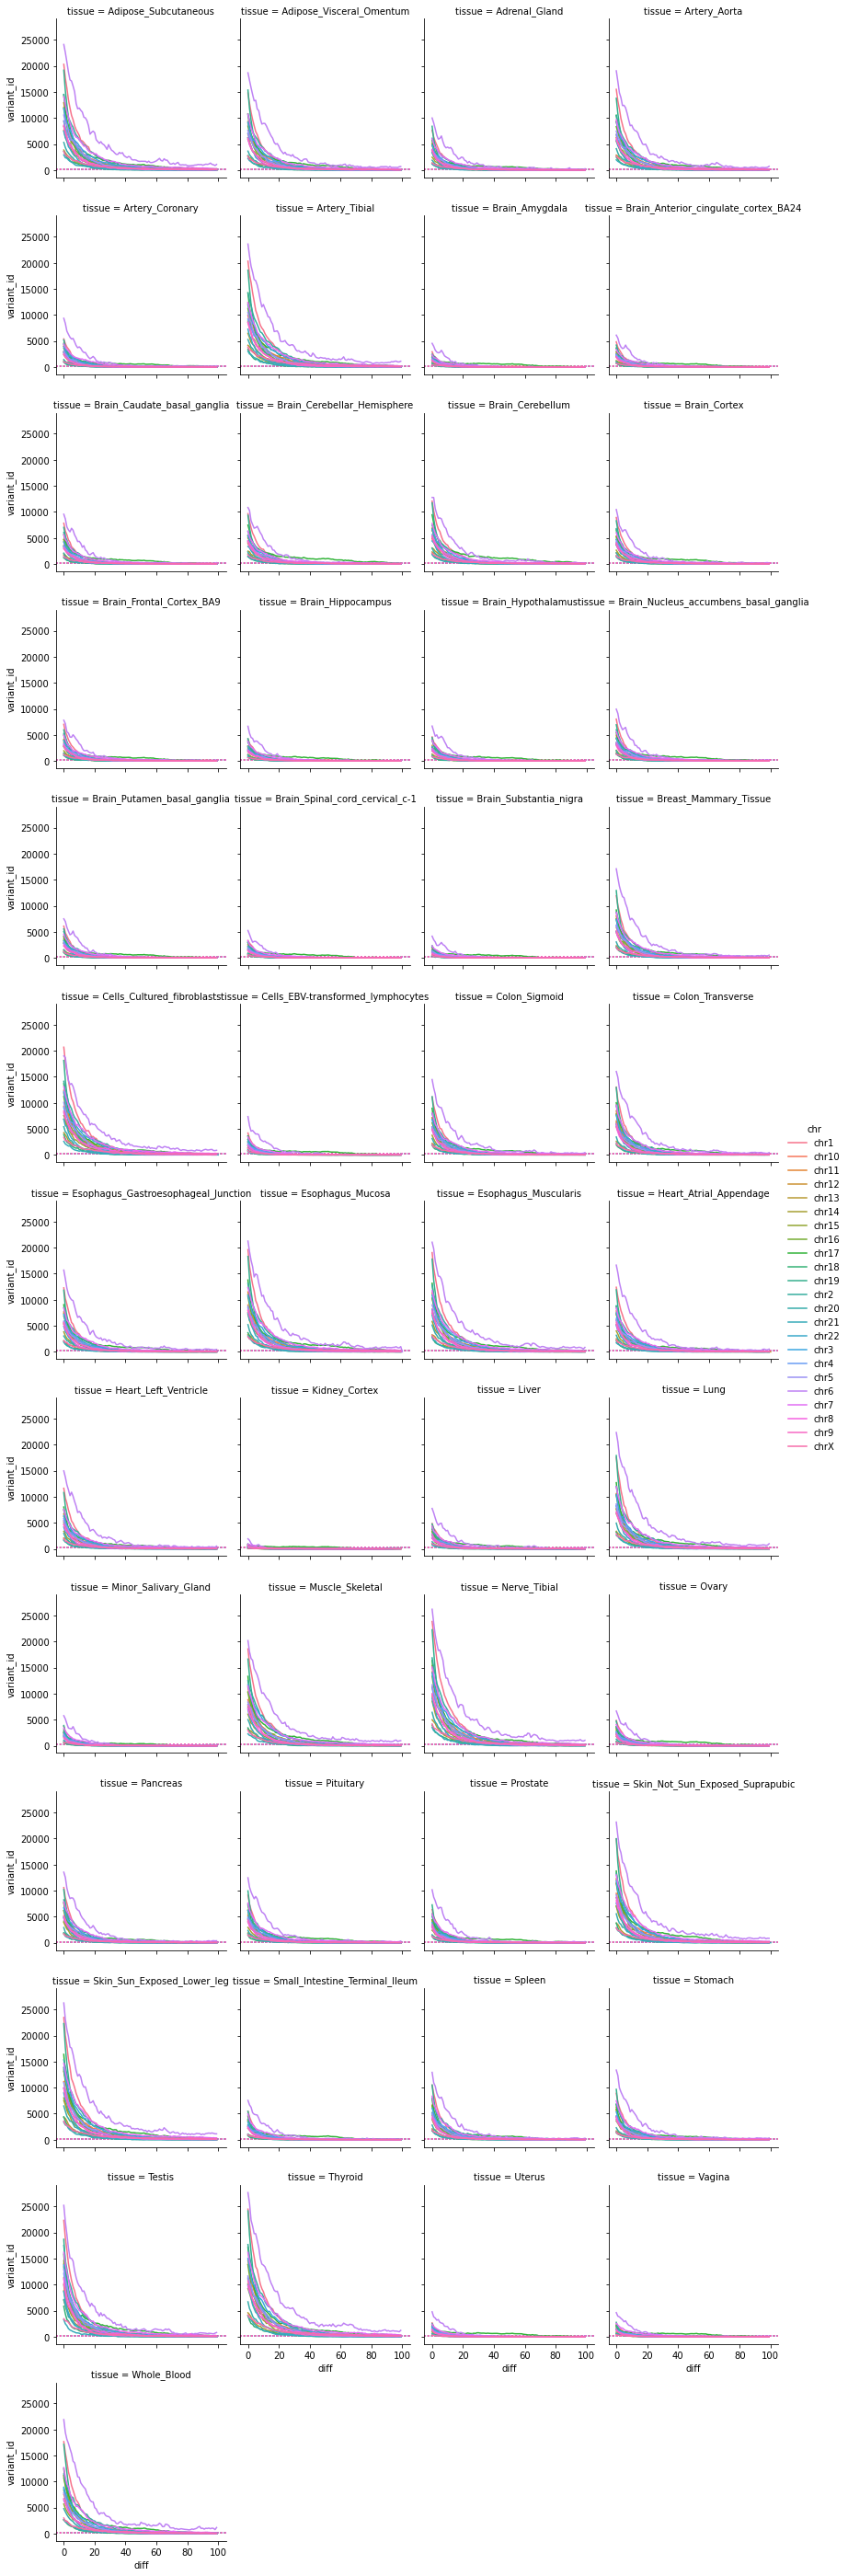

In [150]:
g = sns.FacetGrid(y, col='tissue', col_wrap=4, hue='chr')
g.map(plt.axhline, y=200, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "variant_id")
g.add_legend()

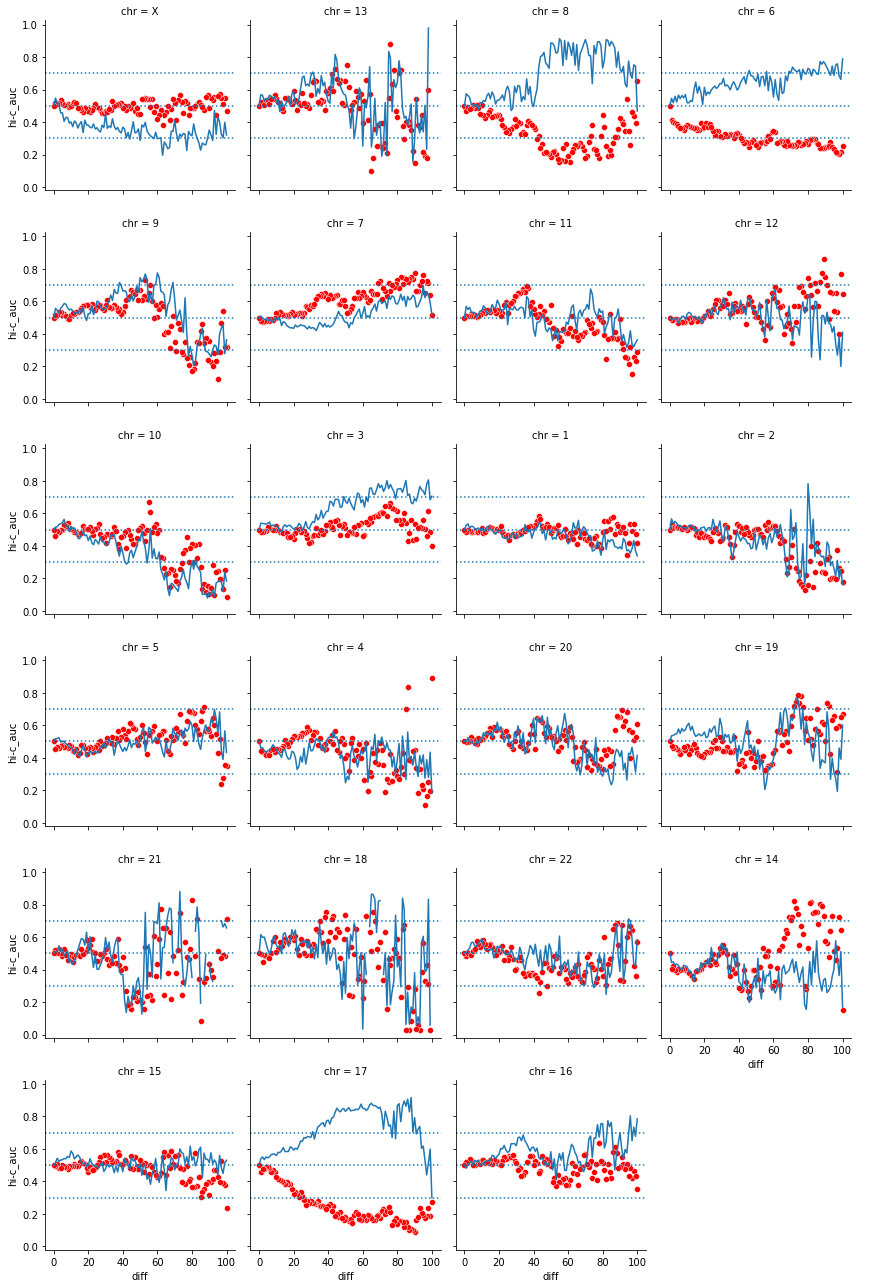

In [257]:
g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['tissue']=='Whole_Blood'], col='chr', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "cn_auc")
g.map(sns.scatterplot, 'diff', "hi-c_auc", color='red')
g.add_legend()

In [261]:
auc_each_tissue[auc_each_tissue['tp'] > 200]

hi-c_auc    cn_auc  diff chr           tissue    tp     tn type_sim  \
50  0.440782  0.397916    50  11  Muscle_Skeletal   250  85022  jaccard   
9   0.459900  0.519485     9  16  Muscle_Skeletal  3298  71913  jaccard   
29  0.493090  0.587534    29  16  Muscle_Skeletal   774  72471  jaccard   
30  0.446909  0.611648    30  16  Muscle_Skeletal   838  73127  jaccard   
31  0.385911  0.643203    31  16  Muscle_Skeletal   777  73186  jaccard   
..       ...       ...   ...  ..              ...   ...    ...      ...   
25       NaN       NaN    25  18    Kidney_Cortex     0  29809  jaccard   
24       NaN       NaN    24  18    Kidney_Cortex     0  29976  jaccard   
23       NaN       NaN    23  18    Kidney_Cortex     0  30119  jaccard   
22  0.103025  0.107538    22  18    Kidney_Cortex     4  30356  jaccard   
19  0.318198  0.682644    19  10    Kidney_Cortex    52  74391  jaccard   

    samples  tissue_size  
50    85272          706  
9     75211          706  
29    73245          706  
30    73965          706  
31    73963          706  
..      ...          ...  
25    29809           73  
24    29976           73  
23    30119           73  
22    30360           73  
19    74443           73  

[108373 rows x 10 columns]

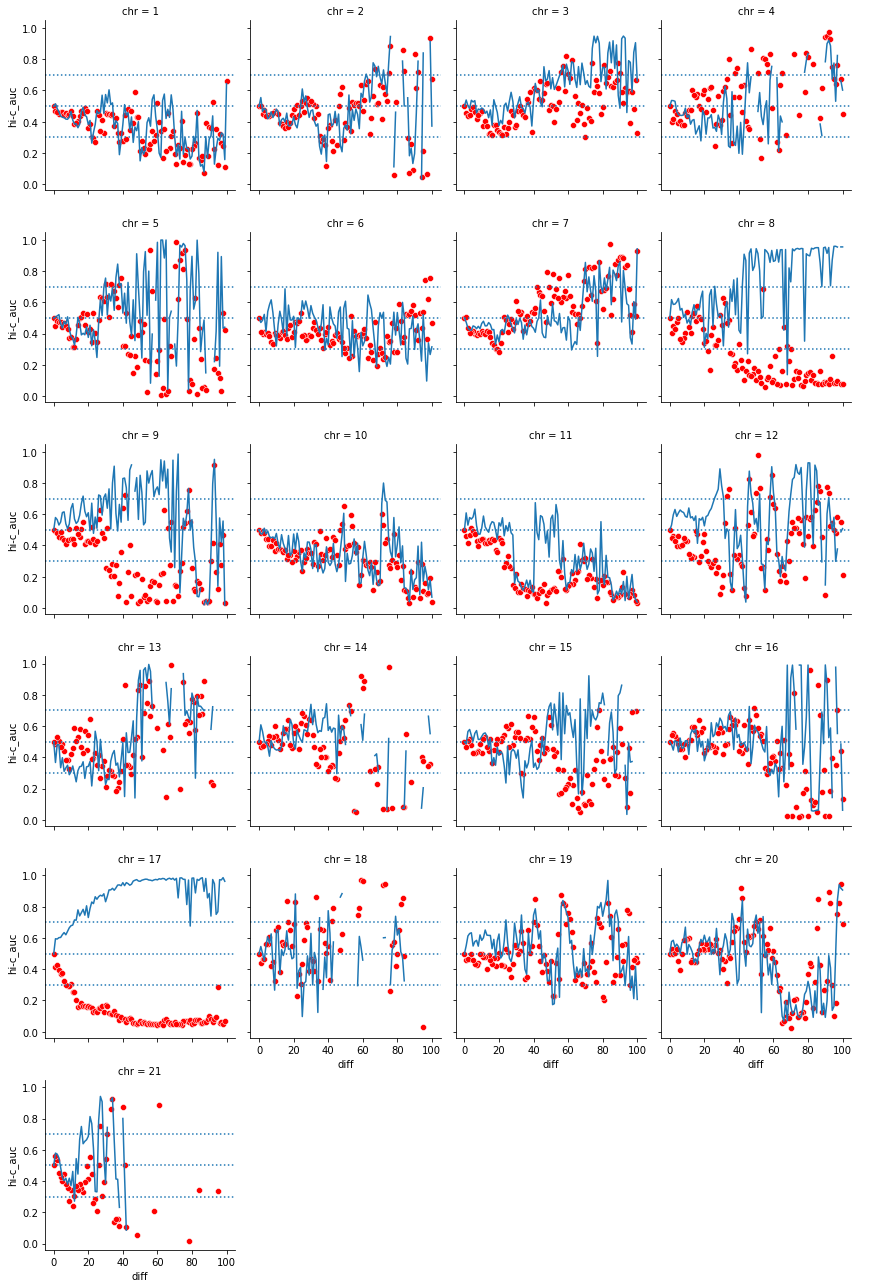

In [258]:
g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['tissue']=='Brain_Amygdala'], col='chr', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "cn_auc")
g.map(sns.scatterplot, 'diff', "hi-c_auc", color='red')
g.add_legend()

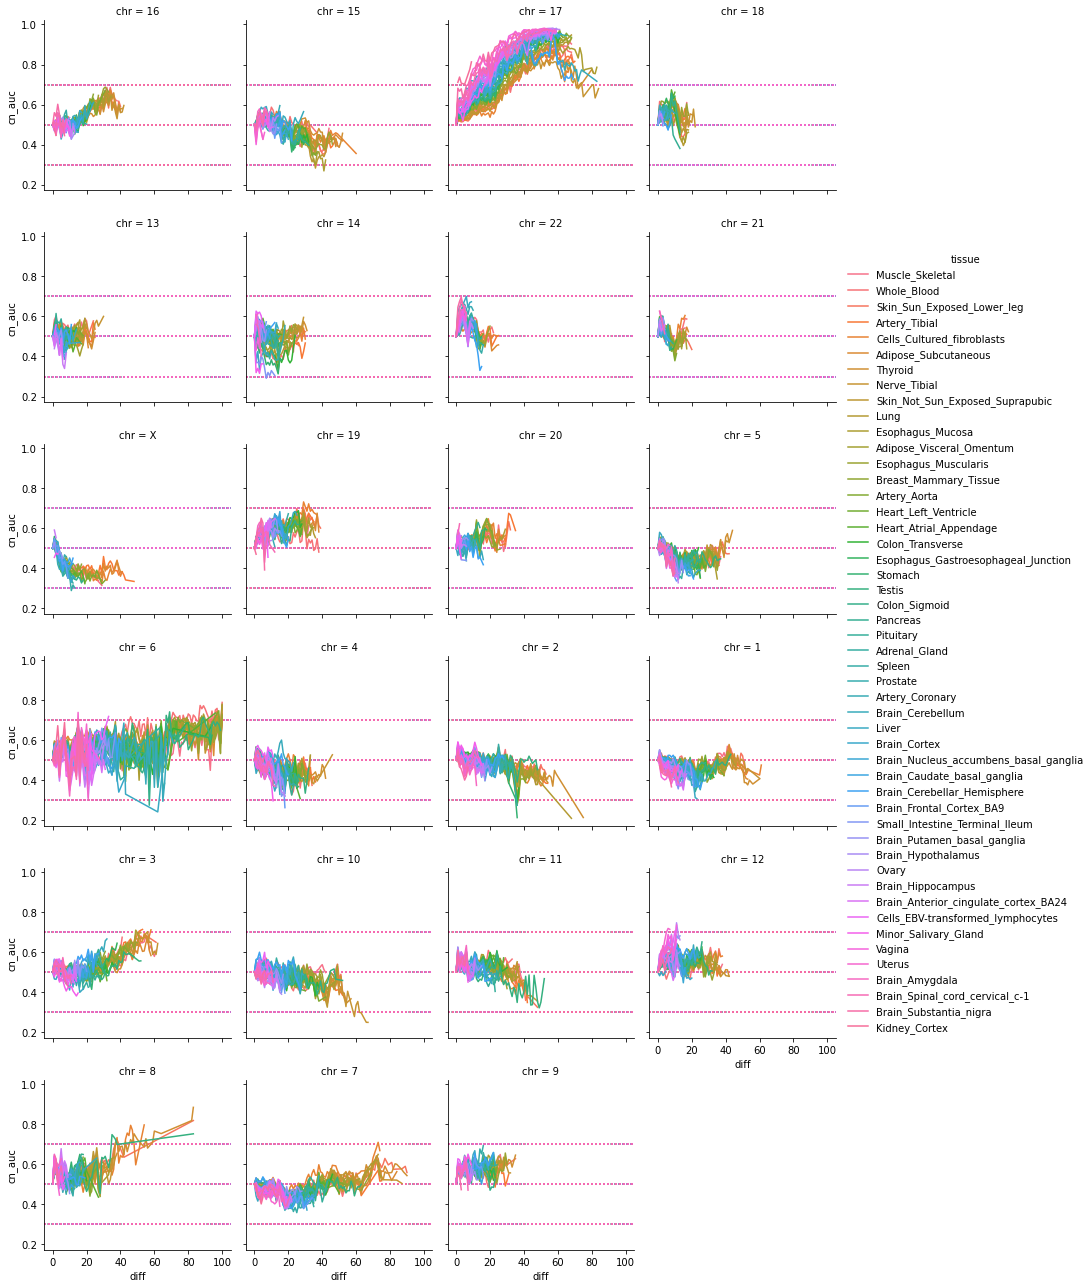

In [264]:
g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['tp'] > 500], col='chr', col_wrap=4, hue='tissue')
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "cn_auc")
#g.map(sns.scatterplot, 'diff', "hi-c_auc", color='red')
g.add_legend()

In [246]:
g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr'] == 17], col='tissue', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.scatterplot, 'diff', "cn_auc")
g.map(sns.scatterplot, 'diff', "hi-c_auc", color='red')
g.add_legend()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 864x0 with 0 Axes>

KeyError: "['cn_auc'] not in index"

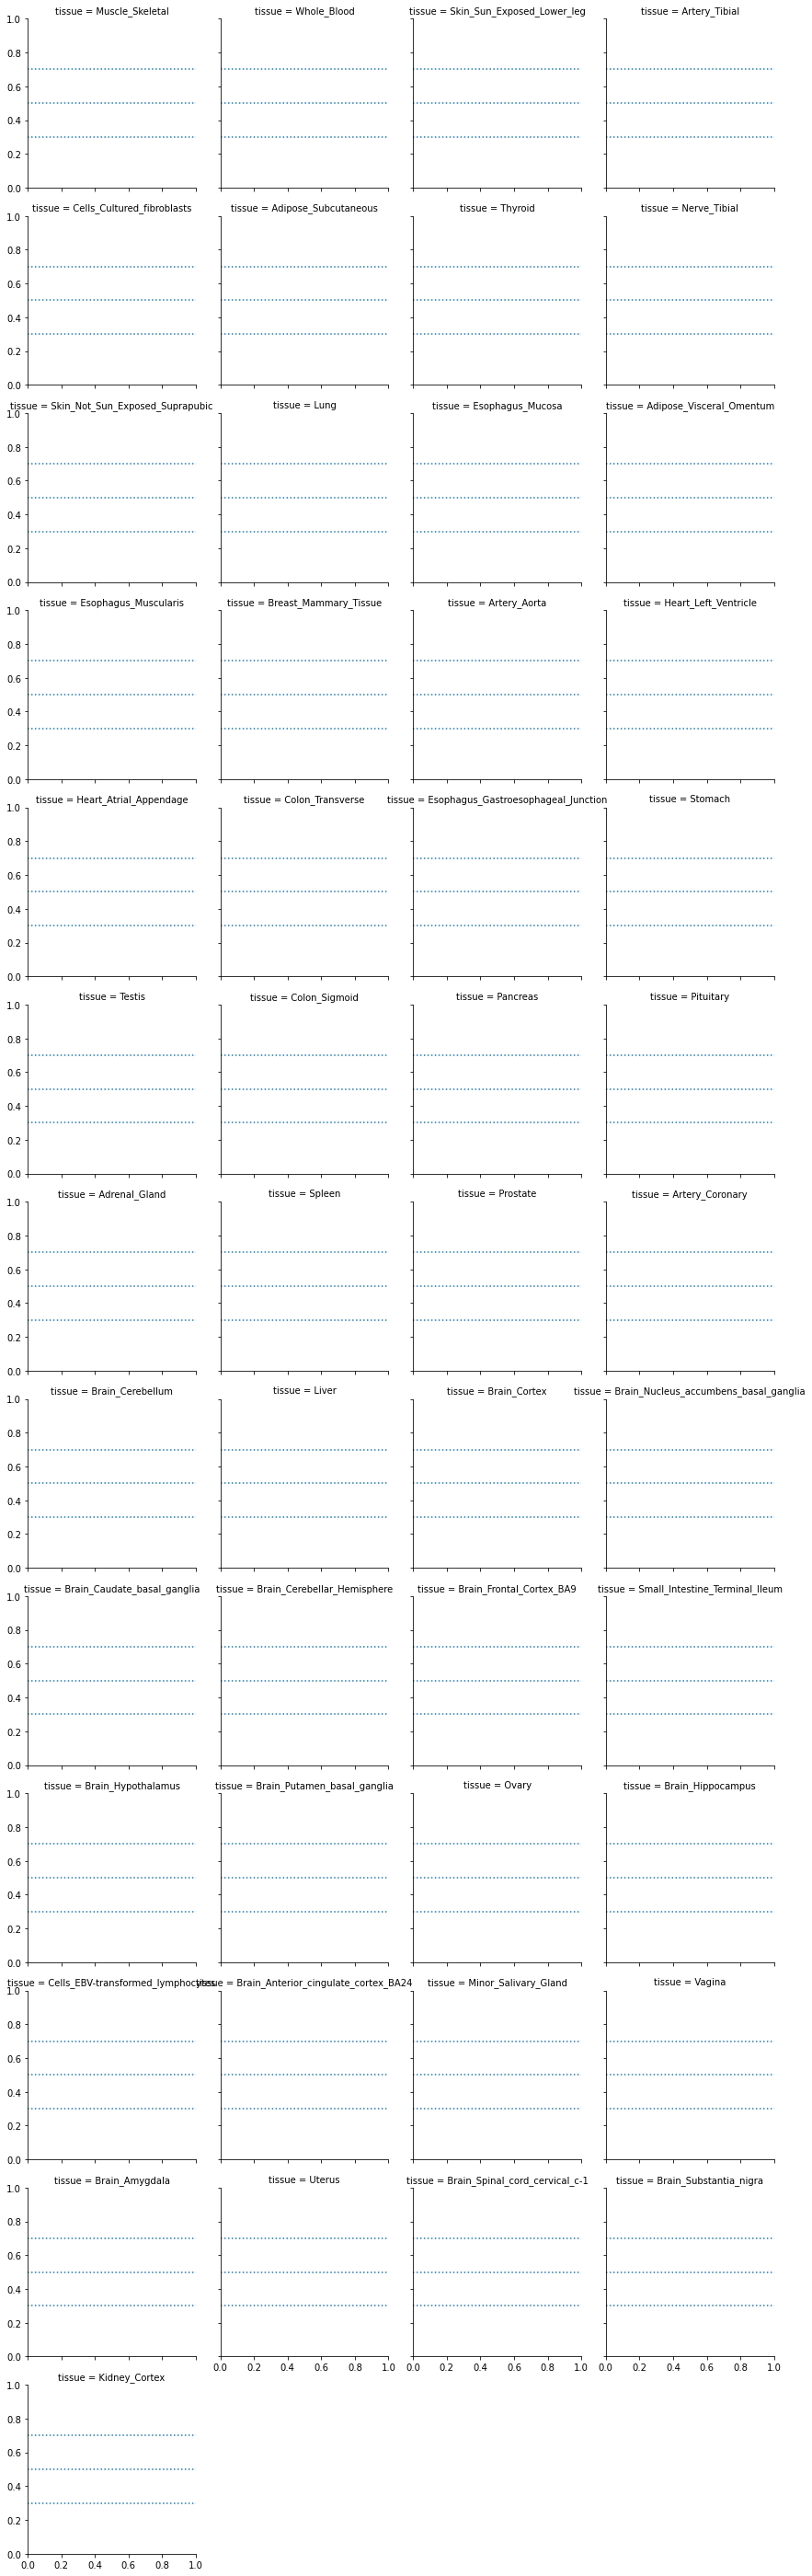

In [64]:
g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.scatterplot, 'diff', "cn_auc")
g.map(sns.scatterplot, 'diff', "hi-c_auc", color='red')
g.add_legend()

In [244]:
auc_each_tissue[auc_each_tissue['chr'] == 6]

hi-c_auc    cn_auc  diff  chr           tissue    tp      tn type_sim  \
87  0.279739  0.625626    87    6  Muscle_Skeletal  1045  106845  jaccard   
86  0.296149  0.567011    86    6  Muscle_Skeletal   949  105951  jaccard   
85  0.300208  0.611384    85    6  Muscle_Skeletal   934  105812  jaccard   
84  0.311211  0.562611    84    6  Muscle_Skeletal   860  103931  jaccard   
83  0.323523  0.591887    83    6  Muscle_Skeletal   838  104705  jaccard   
..       ...       ...   ...  ...              ...   ...     ...      ...   
37  0.292283  0.660380    37    6    Kidney_Cortex    65  122512  jaccard   
36  0.404907  0.613039    36    6    Kidney_Cortex    49  121849  jaccard   
35  0.468272  0.542433    35    6    Kidney_Cortex    57  123481  jaccard   
34  0.508294  0.611391    34    6    Kidney_Cortex   117  120946  jaccard   
33  0.502535  0.563866    33    6    Kidney_Cortex   117  121808  jaccard   

    samples  tissue_size  
87   107890          706  
86   106900          706  
85   106746          706  
84   104791          706  
83   105543          706  
..      ...          ...  
37   122577           73  
36   121898           73  
35   123538           73  
34   121063           73  
33   121925           73  

[4949 rows x 10 columns]

In [63]:
auc_each_tissue[auc_each_tissue['tissue']== 'Muscle_Skeletal']

auc_hic    auc_cn     tp       tn  diff           tissue  samples  \
50  0.397228  0.578696   7884  1547662    50  Muscle_Skeletal  1555546   
63  0.376060  0.575834   5510  1551763    63  Muscle_Skeletal  1557273   
73  0.395464  0.600700   4423  1551611    73  Muscle_Skeletal  1556034   
72  0.398774  0.603868   4342  1558761    72  Muscle_Skeletal  1563103   
71  0.346894  0.585170   4483  1559319    71  Muscle_Skeletal  1563802   
..       ...       ...    ...      ...   ...              ...      ...   
29  0.442296  0.529613  20892  1542359    29  Muscle_Skeletal  1563251   
28  0.452505  0.515708  21949  1539105    28  Muscle_Skeletal  1561054   
27  0.440349  0.525176  23488  1533577    27  Muscle_Skeletal  1557065   
26  0.441813  0.529588  24513  1533097    26  Muscle_Skeletal  1557610   
99  0.320477  0.567162   2471  1542533    99  Muscle_Skeletal  1545004   

    tissue_size  
50          706  
63          706  
73          706  
72          706  
71          706  
..          ...  
29          706  
28          706  
27          706  
26          706  
99          706  

[101 rows x 8 columns]

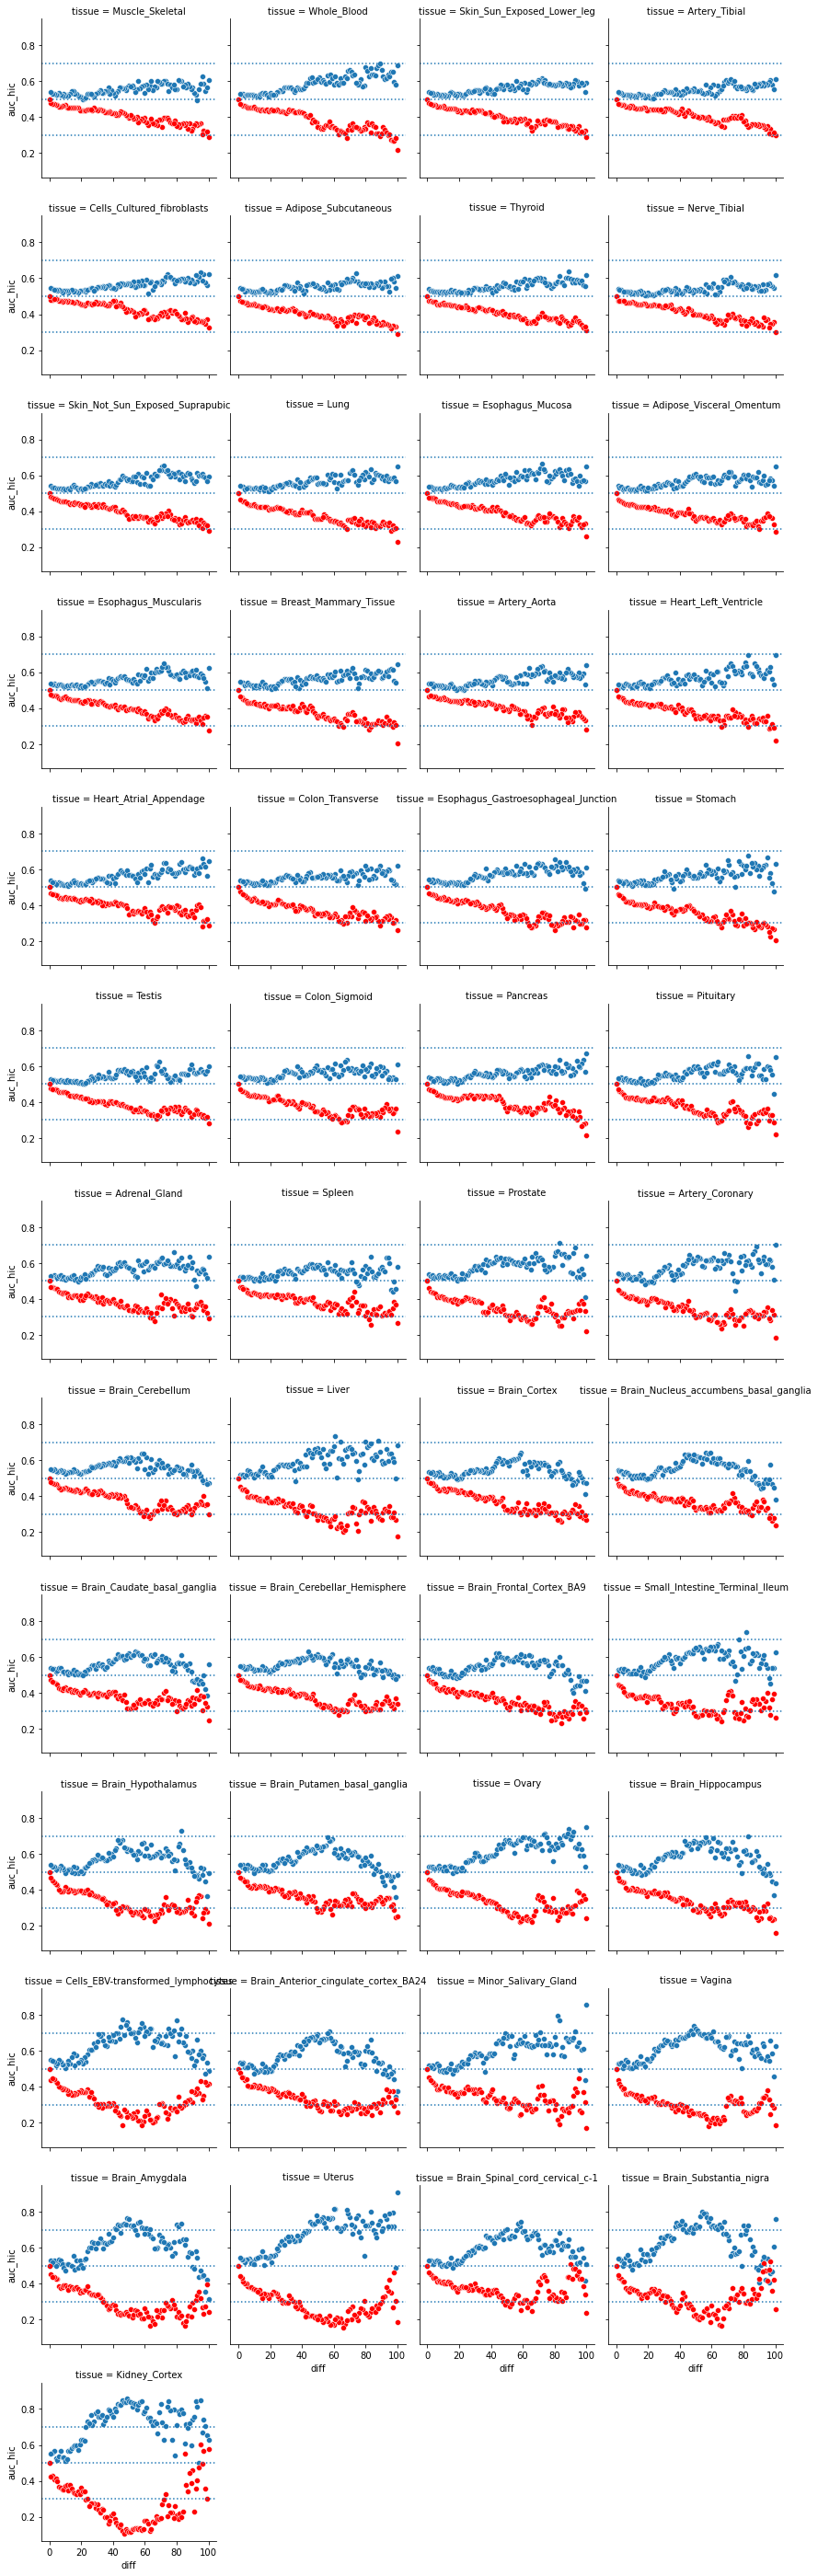

In [65]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(auc_each_tissue, col='tissue', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.scatterplot, 'diff', "auc_cn")
g.map(sns.scatterplot, 'diff', "auc_hic", color='red')
g.add_legend()

In [151]:
sig_var

NameError: name 'sig_var' is not defined

(0.0, 500.0)

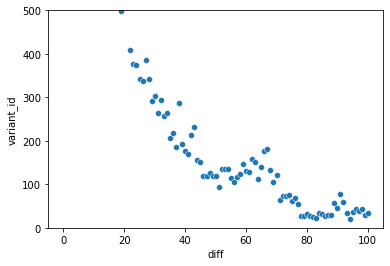

In [77]:
ax = sns.scatterplot(data=y[y['truth']==1], x='diff', y='variant_id')
ax.set_ylim([0,500])

(0.0, 500.0)

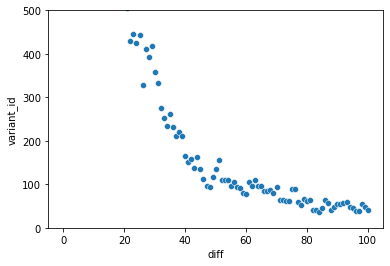

In [67]:
ax = sns.scatterplot(data=y[y['truth']==1], x='diff', y='variant_id')
ax.set_ylim([0,500])

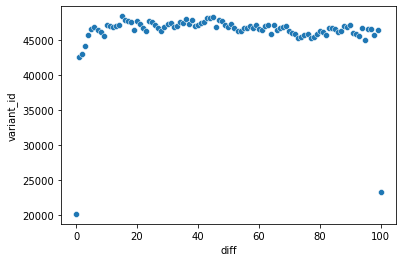

In [34]:
ax = sns.scatterplot(data=df_combine_list[0][df_combine_list[0]['truth']==0].groupby(['diff'])['variant_id'].count().reset_index(), x='diff', y='variant_id')
#ax.set_ylim([0,100])

In [19]:
import seaborn as sns

In [4]:
df['id_var'] = df['chr'] + df['chr']

In [20]:
df2 = pd.concat(all_chr_tis_auc)

In [21]:
df2['cn_auc'] = df2['hi-c_auc']

In [22]:
df2['type_sim'] = 'hi-c'

In [23]:
df = pd.concat([df, df2])

In [ ]:
pd.melt(df, id_vars=[''], value_vars=['B', 'C'], ignore_index=False)

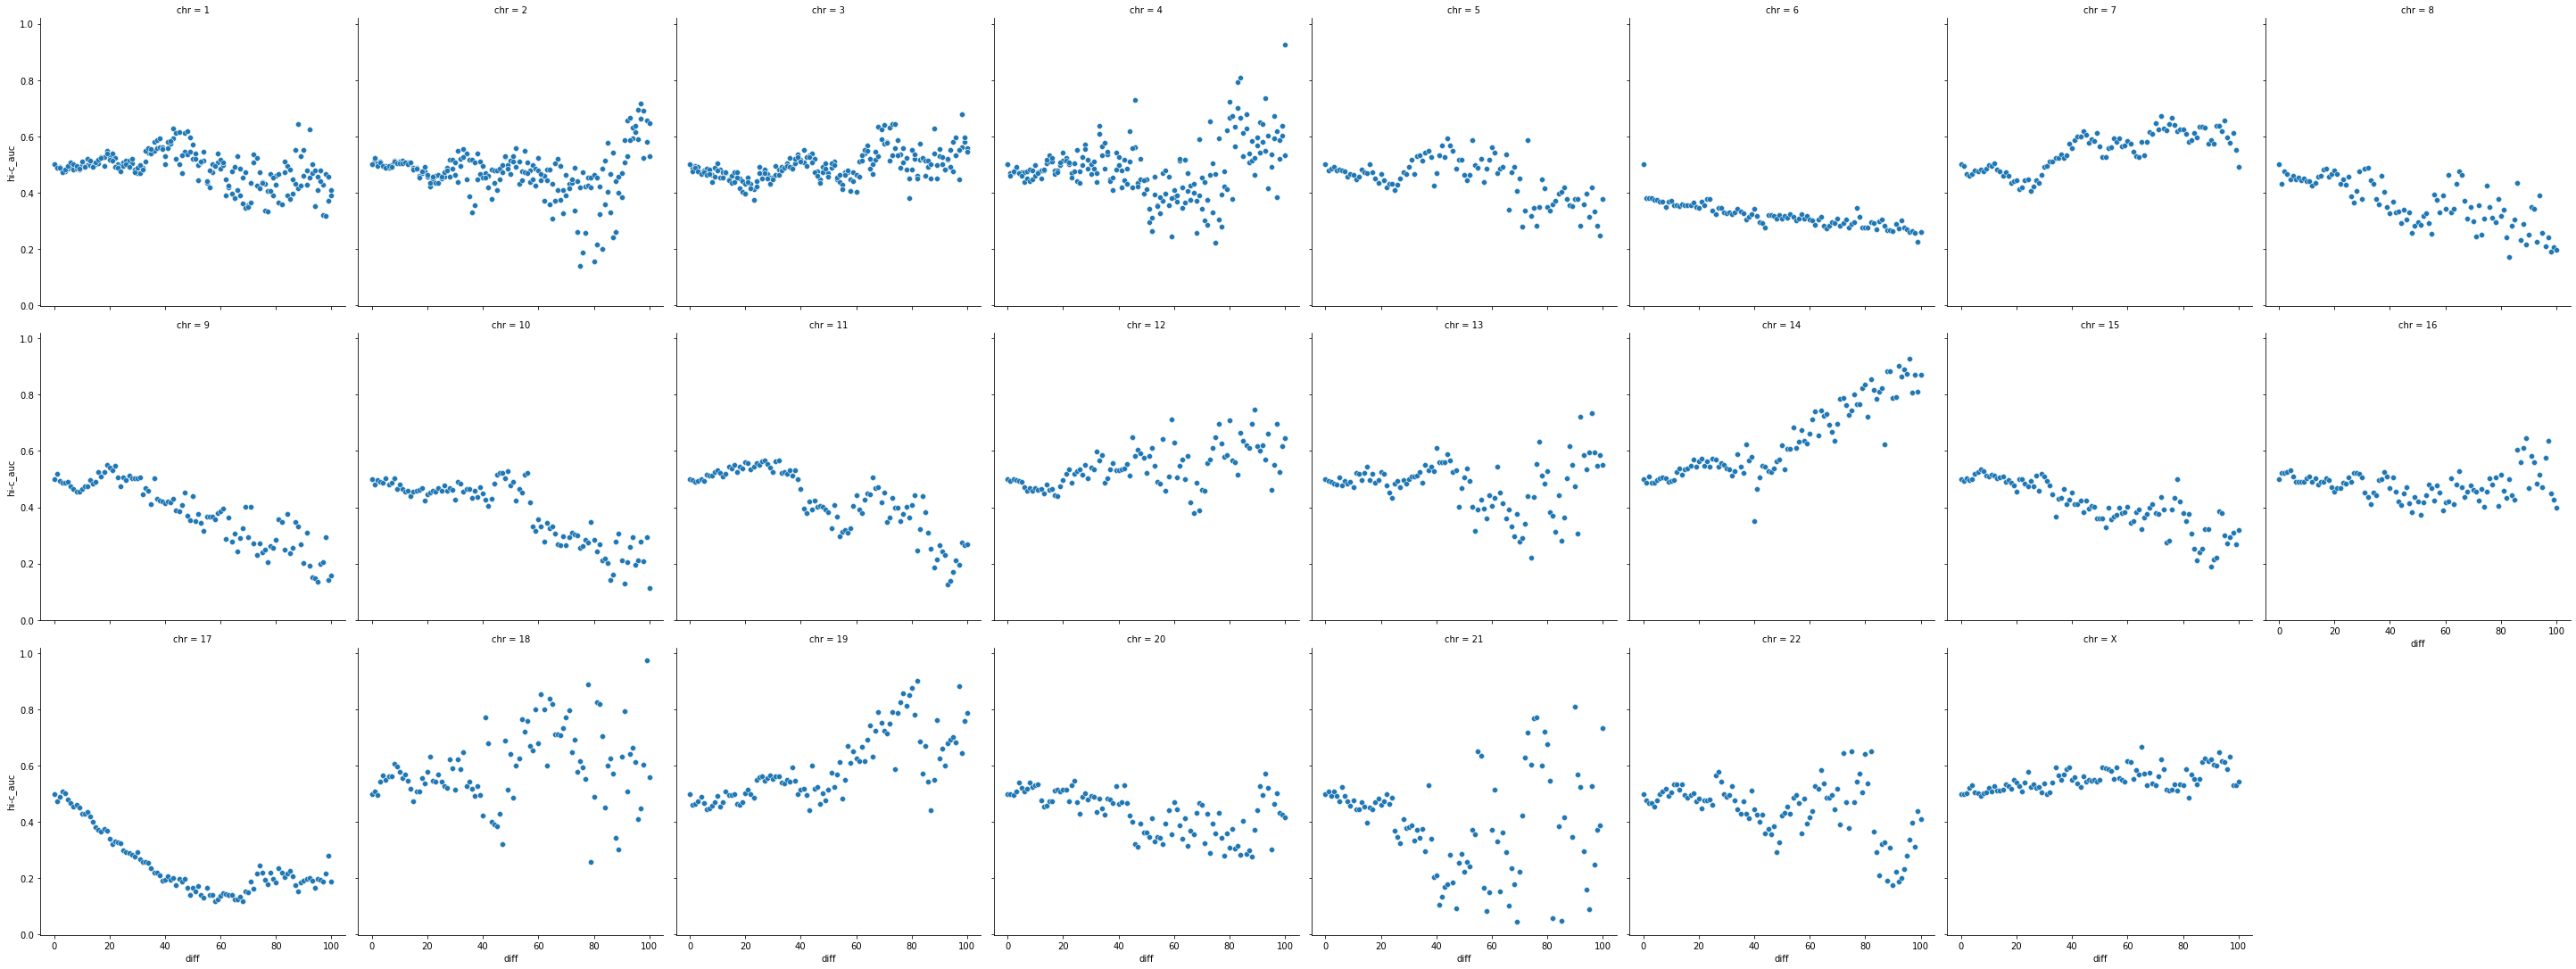

In [79]:
sns.relplot(data=df, y='hi-c_auc', x='diff', col='chr', kind='scatter', col_wrap=8)

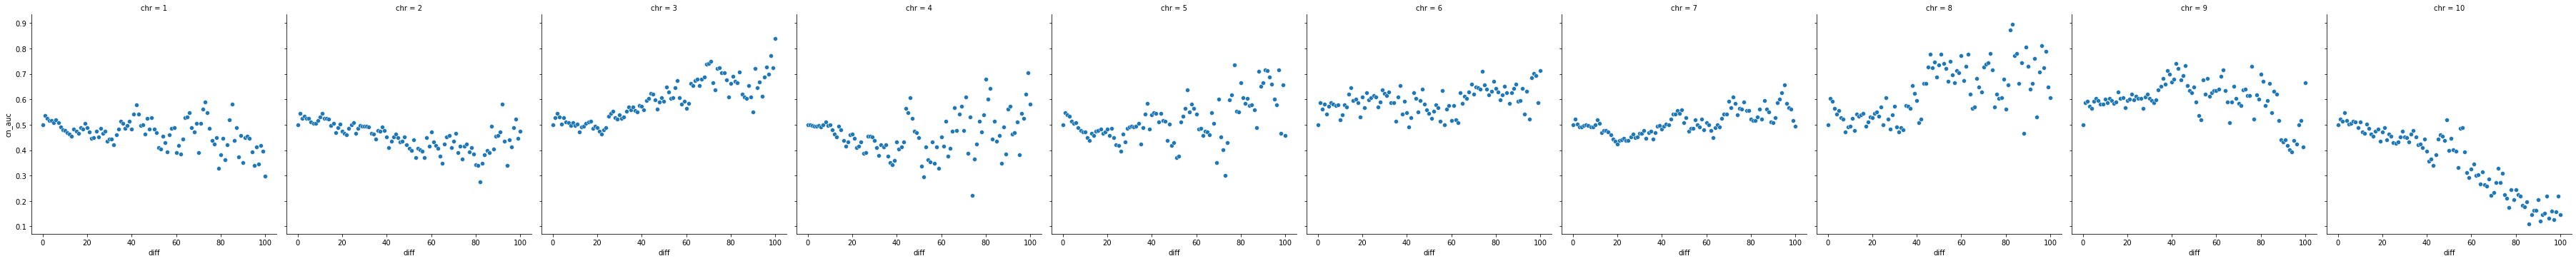

In [67]:
sns.relplot(data=df, y='cn_auc', x='diff', col='chr', kind='scatter')

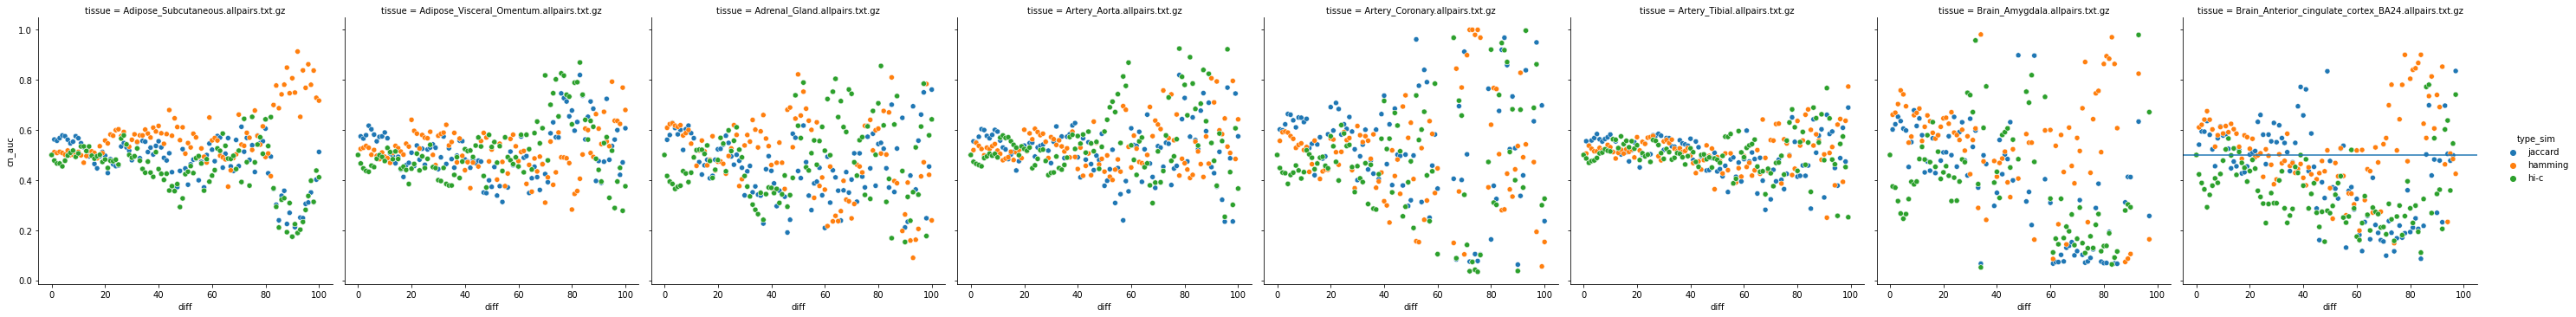

In [24]:
import matplotlib.pyplot as plt
ax = sns.relplot(data=df, y='cn_auc', x='diff', col='tissue', kind='scatter', col_wrap=8, hue='type_sim')
plt.axhline(0.5)

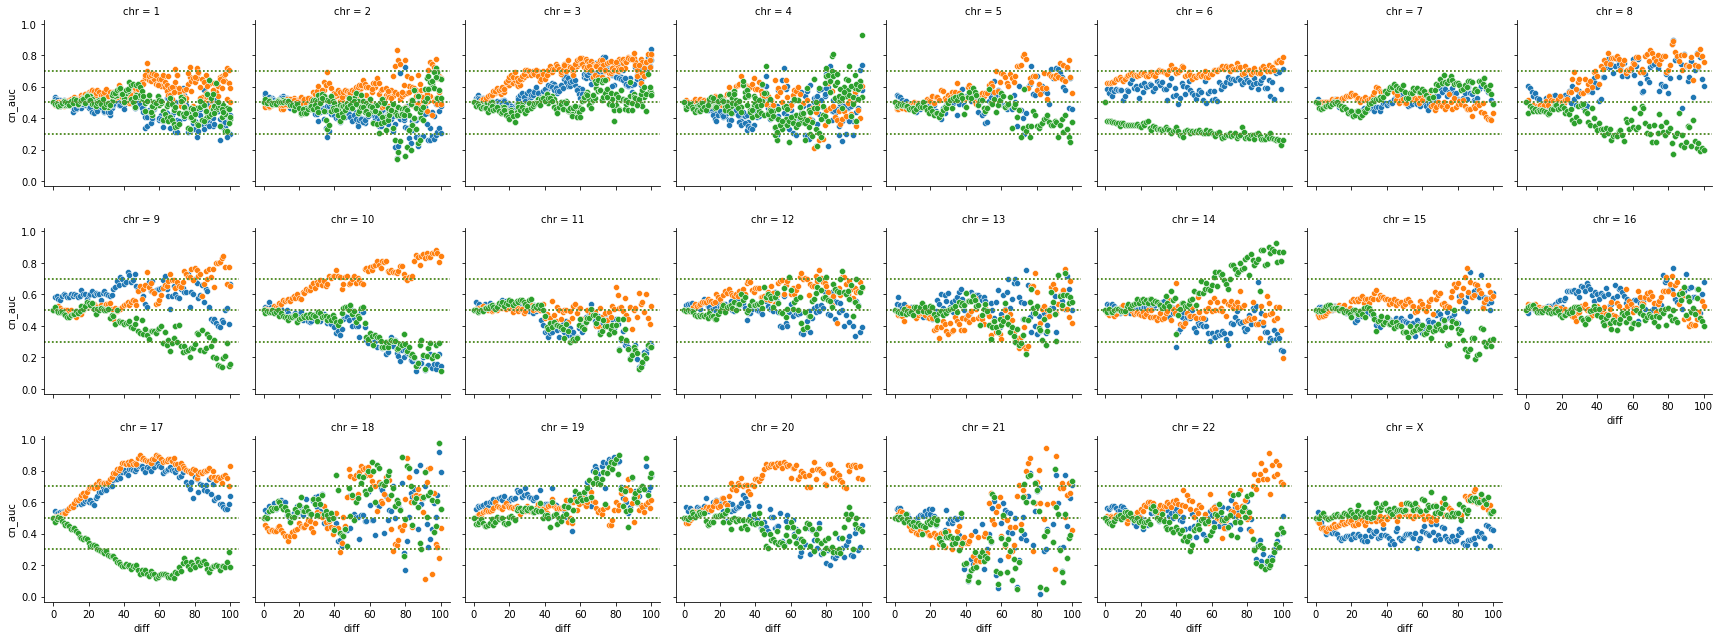

In [96]:
g = sns.FacetGrid(df, col='chr', col_wrap=8,  hue ='type_sim')
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.scatterplot, "diff", "cn_auc")

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


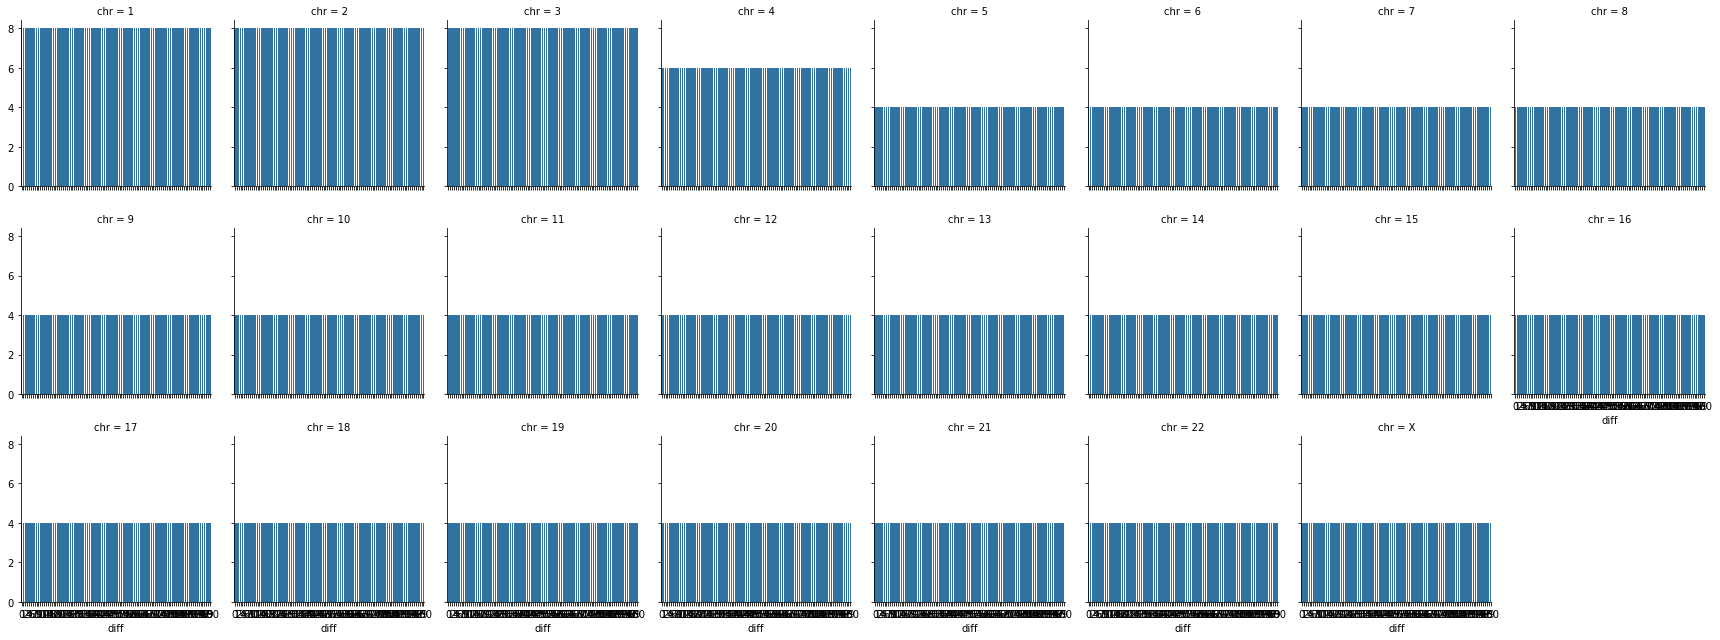

In [98]:
g = sns.FacetGrid(df, col='chr', col_wrap=8)
#g.map(plt.axhline, y=0.5, ls=":")
#g.map(plt.axhline, y=0.7, ls=":")
#g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.countplot, "diff")

<AxesSubplot:xlabel='chr', ylabel='count'>

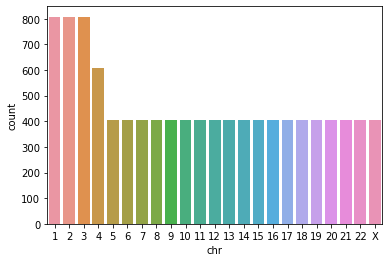

In [99]:
sns.countplot(x='chr', data=df)

<AxesSubplot:xlabel='diff', ylabel='cn_auc'>

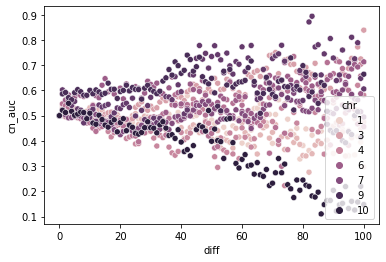

In [64]:
#new way (ham)
sns.scatterplot(data=df, y='cn_auc', x='diff', hue='chr')

<AxesSubplot:xlabel='diff', ylabel='cn_auc'>

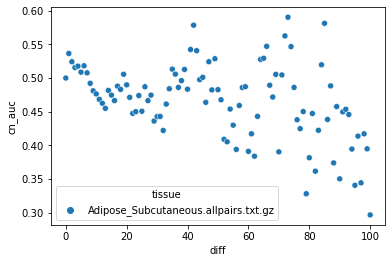

In [41]:
#chr1 new way (jac)
sns.scatterplot(data=df, y='cn_auc', x='diff', hue='tissue')

<AxesSubplot:xlabel='diff', ylabel='hi-c_auc'>

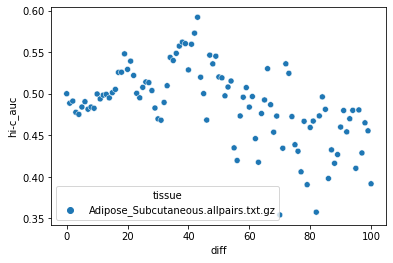

In [42]:
sns.scatterplot(data=df, y='hi-c_auc', x='diff', hue='tissue')

<AxesSubplot:xlabel='diff', ylabel='cn_auc'>

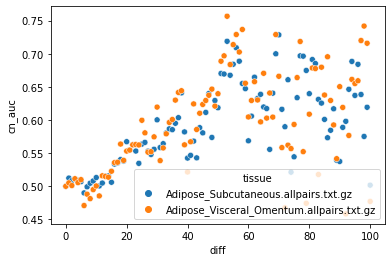

In [26]:
#chr1 old way
sns.scatterplot(data=df, y='cn_auc', x='diff', hue='tissue')

<AxesSubplot:xlabel='diff', ylabel='cn_auc'>

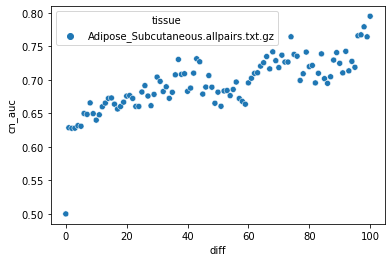

In [30]:
#chr6 old way
sns.scatterplot(data=df, y='cn_auc', x='diff', hue='tissue')

<AxesSubplot:xlabel='diff', ylabel='cn_auc'>

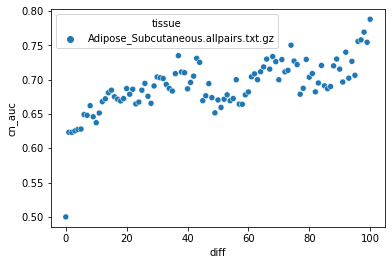

In [37]:
#chr6 new way (ham)
sns.scatterplot(data=df, y='cn_auc', x='diff', hue='tissue')

<AxesSubplot:xlabel='diff', ylabel='cn_auc'>

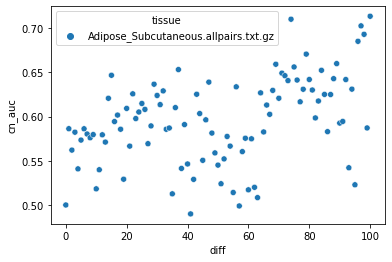

In [33]:
#chr6 new way (jac)
sns.scatterplot(data=df, y='cn_auc', x='diff', hue='tissue')

<AxesSubplot:xlabel='diff', ylabel='hi-c_auc'>

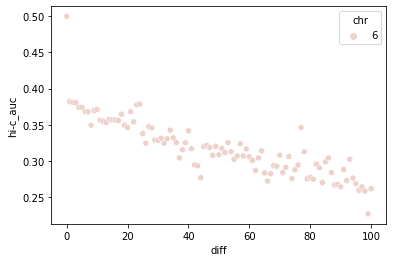

In [38]:
sns.scatterplot(data=df, y='hi-c_auc', x='diff', hue='chr')

In [21]:
df

predicted_score  true_pos  true_neg
0             0.894919         0         1
1             0.894919         0         1
2             0.894919         0         1
3             0.894919         0         1
4             0.894919         0         1
...                ...       ...       ...
48415         0.862202         0         1
48416         0.862202         0         1
48417         0.862202         0         1
48418         0.862202         0         1
48419         0.862202         0         1

[48420 rows x 3 columns]

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

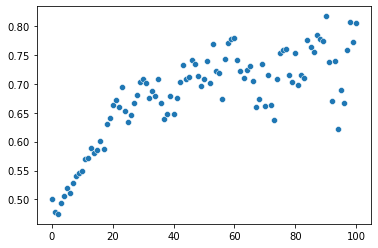

In [20]:
sns.scatterplot(diff_list, auc_list_cn)

In [27]:
df2 = pd.concat(df_combine_list)

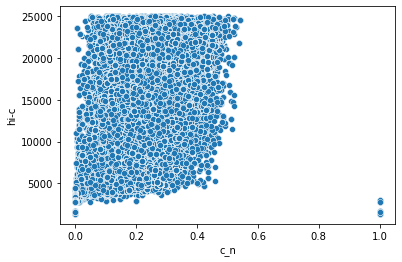

In [102]:
ax = sns.scatterplot(data=df2[df2['truth']==1], x='c_n', y='hi-c', )

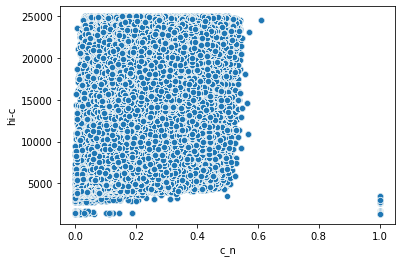

In [103]:
ax = sns.scatterplot(data=df2[df2['truth']==0], x='c_n', y='hi-c', )

<AxesSubplot:xlabel='truth', ylabel='hi-c'>

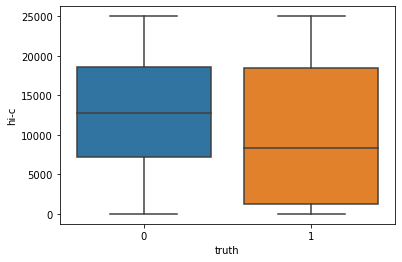

In [13]:
sns.boxplot(data=df2, x='truth', y='hi-c')

<AxesSubplot:xlabel='truth', ylabel='c_n'>

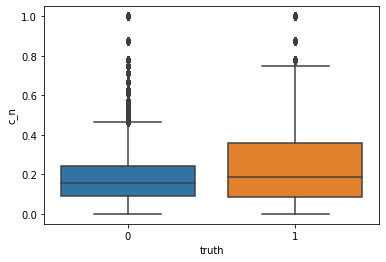

In [111]:
sns.boxplot(data=df2, x='truth', y='c_n')

<AxesSubplot:xlabel='truth', ylabel='c_n'>

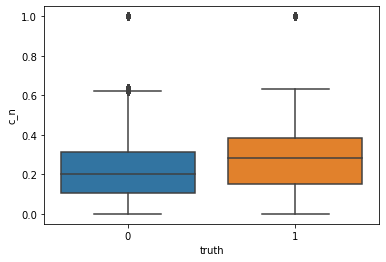

In [20]:
import seaborn as sns
sns.boxplot(data=df2, x='truth', y='c_n')

In [ ]:
sns.boxplot(data=df2, x='truth', y='c_n')

In [9]:
from lohia_utilities.calculate_auc import calc_auroc

In [28]:
for given_chr in  df_combine_list:         
              auc_list_tss = []
              auc_list_cn = []
              diff_list = []
              
              
              grouped_gene_id = given_chr.groupby(['diff'])
              
              for gene_id in grouped_gene_id.groups.keys():
                  df_gene = grouped_gene_id.get_group(gene_id)
                  diff_list.append(gene_id)
                  #print (df_gene)
                  #df_gene.dropna(subset=['exp'], inplace=True) 
                  #print (df_gene.shape)
                  
                  pval_upper = df_gene['pval_nominal'].min()
                  #print (exp_upper)
                  #exp_lower = np.percentile(df_2_or[['exp']], 50)
                  
                  df = pd.DataFrame(columns = ['predicted_score', 'true_pos', 'true_neg'])   

                  #paired_df['exp_label'] = [1.0 if x > exp_upper else 0.0 if x < exp_lower else np.nan for x in paired_df['exp']]
                      
                  df['predicted_score'] = df_gene['hi-c'].tolist()
                  #df['predicted_score'] = df_gene['tss_distance'].tolist()
                  #df['predicted_score'] = 1/df['predicted_score']
                  #df['predicted_score'] = df['predicted_score'].abs()
                  #df['true_pos'] = [1 if ((x== pval_upper) and (y==1)) else 0 for x,y in zip(df_gene['pval_nominal'], df_gene['truth'])]
                  df['true_pos'] = df_gene['truth'].tolist()
                  #print (len(df['true_pos'].to_list()))
                  df['true_neg'] = [0 if x==1 else 1 for x in df['true_pos']]
                  #print (calc_auroc(df,predicted_score='predicted_score'))
                  calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                  auc_list_tss.append(calculated_auc)
                  df['predicted_score'] = df_gene['c_n'].tolist()
                  calculated_auc = calc_auroc(df,predicted_score='predicted_score')
                  auc_list_cn.append(calculated_auc)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

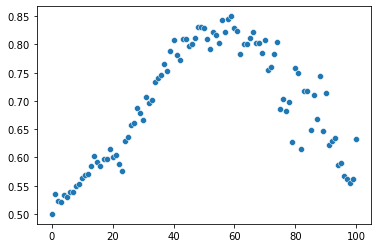

In [29]:
sns.scatterplot(diff_list, auc_list_cn)

In [30]:
arr = np.array(auc_list_cn)
np.nanmean(arr)

0.6940618772602233

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

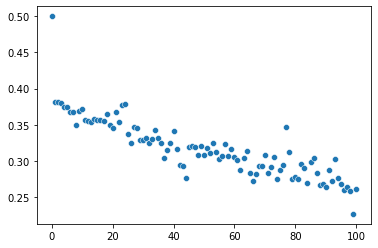

In [25]:
sns.scatterplot(diff_list, auc_list_tss)

<AxesSubplot:xlabel='diff', ylabel='c_n'>

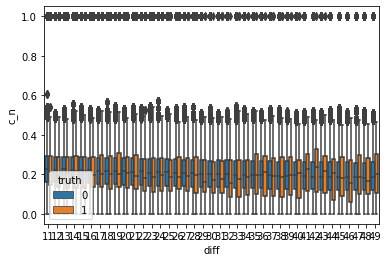

In [104]:
sns.boxplot(data=df2[df2['diff']<50], hue='truth', y='c_n', x='diff')

In [72]:
df2

gene_id               variant_id  tss_distance  ma_samples  \
152730643  ENSG00000282458     chr19_199750_C_G_b38        128184          46   
152730644  ENSG00000282458     chr19_218383_G_T_b38        146817          11   
152730645  ENSG00000282458     chr19_225487_C_T_b38        153921          17   
152730646  ENSG00000282458     chr19_226776_C_T_b38        155210         433   
152730647  ENSG00000282458     chr19_229783_G_A_b38        158217         294   
...                    ...                      ...           ...         ...   
166369058  ENSG00000213753   chr19_58467696_C_T_b38       -107749         185   
166369059  ENSG00000213753   chr19_58467807_T_C_b38       -107638         256   
166369060  ENSG00000213753   chr19_58468591_C_T_b38       -106854          66   
166369061  ENSG00000213753   chr19_58468739_G_A_b38       -106706          16   
166369062  ENSG00000213753  chr19_58469863_TG_T_b38       -105582          36   

           ma_count       maf  pval_nominal     slope  slope_se    chr  ...  \
152730643        46  0.045010  2.774990e-01  0.166437  0.153100  chr19  ...   
152730644        13  0.011188  1.222790e-01 -0.375049  0.242304  chr19  ...   
152730645        17  0.014630  3.143790e-02 -0.514797  0.238616  chr19  ...   
152730646       581  0.500000  7.837680e-07  0.290561  0.058096  chr19  ...   
152730647       366  0.314974  2.421290e-14 -0.447319  0.056967  chr19  ...   
...             ...       ...           ...       ...       ...    ...  ...   
166369058       209  0.179862  5.439690e-02 -0.077676  0.040287  chr19  ...   
166369059       302  0.259897  6.289450e-01  0.016251  0.033612  chr19  ...   
166369060        66  0.056799  7.244220e-05 -0.269552  0.067373  chr19  ...   
166369061        17  0.014630  4.881940e-01  0.093549  0.134858  chr19  ...   
166369062        36  0.030981  5.701570e-01 -0.050870  0.089531  chr19  ...   

          diff  hi-c-random     hi-c   thresh  thresh_50       c_n  \
152730643   12       1715.0    834.0  22544.0    12552.0  1.000000   
152730644   14       1715.0    822.5  22544.0    12552.0  1.000000   
152730645   15       1715.0   1143.0  22544.0    12552.0  1.000000   
152730646   15       1715.0   1143.0  22544.0    12552.0  1.000000   
152730647   15       1715.0   1143.0  22544.0    12552.0  1.000000   
...        ...          ...      ...      ...        ...       ...   
166369058   11        828.5  20192.0  22544.0    12552.0  0.544781   
166369059   11        828.5  20192.0  22544.0    12552.0  0.544781   
166369060   11        828.5  20192.0  22544.0    12552.0  0.544781   
166369061   11        828.5  20192.0  22544.0    12552.0  0.544781   
166369062   11        828.5  20192.0  22544.0    12552.0  0.544781   

           c_n_random  sample                      variant_id_gene_id  truth  
152730643         0.0    null     chr19_199750_C_G_b38ENSG00000282458      0  
152730644         0.0    null     chr19_218383_G_T_b38ENSG00000282458      0  
152730645         0.0    null     chr19_225487_C_T_b38ENSG00000282458      0  
152730646         0.0    null     chr19_226776_C_T_b38ENSG00000282458      1  
152730647         0.0    null     chr19_229783_G_A_b38ENSG00000282458      1  
...               ...     ...                                     ...    ...  
166369058         0.0    null   chr19_58467696_C_T_b38ENSG00000213753      0  
166369059         0.0    null   chr19_58467807_T_C_b38ENSG00000213753      0  
166369060         0.0    null   chr19_58468591_C_T_b38ENSG00000213753      1  
166369061         0.0    null   chr19_58468739_G_A_b38ENSG00000213753      0  
166369062         0.0    null  chr19_58469863_TG_T_b38ENSG00000213753      0  

[12228505 rows x 26 columns]

<AxesSubplot:xlabel='diff', ylabel='hi-c'>

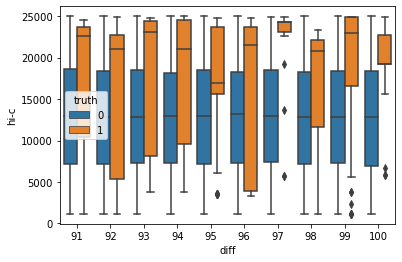

In [70]:
sns.boxplot(data=df2[df2['diff']>90], hue='truth', y='hi-c', x='diff')

<AxesSubplot:xlabel='diff', ylabel='c_n'>

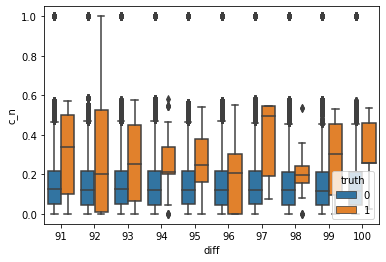

In [71]:
sns.boxplot(data=df2[df2['diff']>90], hue='truth', y='c_n', x='diff')

In [ ]:
array = np.array( [ [1, 0, 1, 1] , [0,1,0, 1] , [1,0,1, 1], [1,1,1,1]])

In [25]:
array = np.array( [ [1, 0, 1] , [0,1,0] , [1,0,1]])

In [28]:
array

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [ ]:
arr = np.where(array < 1, 0, 1)

In [ ]:
np.fill_diagonal(arr, 0)

In [29]:
arr = sparse.csr_matrix(array)

In [21]:
arr = np.random.rand(5000,5000)

In [31]:
sparse.triu(arr, k=1, format='csr').toarray()

array([[0, 0, 1],
       [0, 0, 0],
       [0, 0, 0]])

In [22]:
arr = np.where(arr < 1, 0, 1)

In [5]:
from scipy import sparse, io, spatial

In [23]:
import time
start = time.process_time()
jac_sim = 1-spatial.distance.pdist(arr, 'jaccard')
print(time.process_time() - start)

106.949156504


In [7]:
from sklearn.metrics.pairwise import pairwise_distances

In [24]:
import time
start = time.process_time()

jac_sim = 1 - pairwise_distances(arr, metric = "jaccard")
print(time.process_time() - start)

/home/lohia/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


27.86654738199998


In [ ]:
jac_sim

In [ ]:
data = [['A', 'B', 0], ['A', 'C' ,1], ['B', 'D', 1], ['A', 'D', 1], ['C', 'D', 1] ] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['x', 'y', 'z']) 

In [ ]:
import networkx as nx
adj_tab_network = df[df['z'] > 0]
G_hic=nx.from_pandas_edgelist(adj_tab_network, 'x', 'y')

In [ ]:
G_hic.add_edges_from([('A', 'A'), ('B', 'B'), ('C', 'C'), ('D', 'D'), ('E', 'E')])

In [ ]:
G_hic.add_edges_from([('A', 'A'), ('B', 'B'), ('C', 'C')])

In [ ]:
nx.convert_matrix.to_numpy_matrix(G_hic, nodelist=['A', 'B', 'C', 'D'])

In [ ]:
    jaccard_coefficient = []

    preds = nx.jaccard_coefficient(G_hic,[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'A')] )
    for u, v, p in preds:
                jaccard_coefficient.append(p) 

In [ ]:
jaccard_coefficient

In [ ]:
arr.setdiag(self, 0, k=0)

In [ ]:
thresh = np.percentile(rank_n.toarray(), 90)

In [ ]:
arr = np.where(rank_n.toarray() < thresh, 0, 1)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(arr, metric = "hamming")

In [ ]:
gene_folder = "hi_c_data_processing/software/gene_tx_map"
gene_file = "gencodev32_hg38_known_gene_%s_order.tsv" %chrom
gene_data = pd.read_csv("%s/%s/%s" %(base_folder, gene_folder, gene_file), sep='\t',
                                header=0, index_col=None)
gene_data.set_index('Gene stable ID', inplace=True)


In [ ]:
null_dist = []
null_dist_jc = []
for bin_diff in range(31, 32):
    gene_data['bin'] = gene_data['txStart_outer'] /(resoulution_in_kb*1000)
    gene_data['bin'] = gene_data['bin'].astype('int')
    gene_data['bin'] = gene_data['bin'] 
    gene_index = gene_data['bin'].to_list()
    #print (bin_diff)
    null_dist.extend(rank_n.diagonal(k=-bin_diff)[gene_index[0:-bin_diff]])
    null_dist_jc.extend(sparse.csr_matrix(jac_sim).diagonal(k=-bin_diff)[gene_index[0:-bin_diff]])
    #print (rank_n.diagonal(k=-bin_diff)[gene_index[0:-bin_diff]].mean())
    gene_data['bin'] = gene_data['txStart_outer'] /(resoulution_in_kb*1000)
    gene_data['bin'] = gene_data['bin'].astype('int')
    gene_data['bin'] = gene_data['bin'] - bin_diff
    gene_index = gene_data['bin'].to_list()
    #print (bin_diff)
    null_dist.extend(rank_n.diagonal(k=bin_diff)[gene_index])
    print (sparse.csr_matrix(jac_sim).diagonal(k=bin_diff)[gene_index].mean())
    null_dist_jc.extend(sparse.csr_matrix(jac_sim).diagonal(k=bin_diff)[gene_index])
    #print (rank_n.diagonal(k=bin_diff)[gene_index].mean())

In [ ]:
df = pd.DataFrame(list(zip(cn, null_dist)),
               columns =['eqtl', 'hic'])

In [ ]:
df.T

In [ ]:
sns.violinplot(data=df)

In [ ]:
sns.violinplot(data=df)

In [ ]:
sns.boxplot(data=df)

In [ ]:
#25
import seaborn as sns
sns.histplot(null_dist, kde=True)

In [ ]:
sum(null_dist_jc)/len(null_dist_jc)

In [ ]:
#55
import seaborn as sns
sns.histplot(null_dist_jc, kde=True)

In [ ]:
#55
import seaborn as sns
sns.histplot(null_dist_jc, kde=True)

In [ ]:
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'
networks_list = open(f"{base_folder}/hi_c_data_processing/software//SRA_network/SRA_study_agg.sh", "r")
fraction_list = []
fraction_random_list = []
fraction_diff_list = []
diff_list = []
df_list = []
study = []
tissue_list = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
for networks_s in networks_list:
    for tissue in tissue_list:
        sig_var = pd.read_hdf(f"/sonas-hs/gillis/hpc/data/lohia/eQTL/GTEx_hic/chr10_tss_tss_10_VC_rank_entire_genes_{networks_s.split()[0]}_{tissue.split()[0]}_cn.hdf")
        sig_var['diff'] = sig_var['diff'].abs()
        #sig_var = sig_var[sig_var['diff'] > 30]
        sig_var['study'] = networks_s.split()[0]
        sig_var['tissue'] = tissue.split()[0]
        #fraction = sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 25]['hi-c']]) / sig_var[sig_var['diff'] > 25].shape[0]
        #fraction_list.append(sig_var[sig_var['diff'] > 25]['hi-c'].mean())
        #fraction_random = sum([1 if x> 10000 else 0 for x in sig_var[sig_var['diff'] > 25]['hi-c-random']]) / sig_var[sig_var['diff'] > 25].shape[0]
        #fraction_random_list.append(sig_var[sig_var['diff'] > 25]['hi-c-random'].mean())
        #fraction_diff_list.append(sig_var[sig_var['diff'] > 25]['hi-c'].mean() - sig_var[sig_var['diff'] > 25]['hi-c-random'].mean())
        study.append(tissue.split()[0])
        df_list.append(sig_var)
        l
        print (l)

In [ ]:
all_study = pd.concat(df_list)

In [ ]:
for bin_diff in range(25, 35):
    print (all_study[all_study['diff'] == bin_diff]['hi-c'].mean())

In [ ]:
sns.histplot(all_study[all_study['diff'] == 91]['hi-c'], kde=True)

In [ ]:
sns.histplot(all_study[all_study['diff'] == 91]['hi-c'], kde=True)

In [ ]:
cn = all_study[all_study['diff'] == 31]['hi-c'].to_list()

In [ ]:
all_study[all_study['diff'] == 31]['hi-c'].mean()

In [ ]:
index_x = all_study['tss_bin'].to_list()

In [ ]:
index_y = sig_var['tss_var_bin'].to_list()

In [ ]:
freq_tss = rank_n[index_x, index_y]

In [ ]:
freq_tss

In [ ]:
freq_tss_jc = jac_sim[index_x, index_y]

In [ ]:
freq_tss_jc

In [ ]:
all_study['c_n'] = [x for x in freq_tss_jc]

In [2]:
import pandas as pd
import seaborn as sns
base_folder = '/sonas-hs/gillis/hpc/data/lohia/'

In [4]:
tissue_size = { 'Adipose_Subcutaneous' : 581,
              'Adipose_Visceral_Omentum' : 469,
                         'Adrenal_Gland' : 233,
                          'Artery_Aorta' : 387,
                       'Artery_Coronary' : 213,
                         'Artery_Tibial' : 584,
                        'Brain_Amygdala' : 129,
  'Brain_Anterior_cingulate_cortex_BA24' : 147,
           'Brain_Caudate_basal_ganglia' : 194,
           'Brain_Cerebellar_Hemisphere' : 175,
                      'Brain_Cerebellum' : 209,
                          'Brain_Cortex' : 205,
              'Brain_Frontal_Cortex_BA9' : 175,
                     'Brain_Hippocampus' : 165,
                    'Brain_Hypothalamus' : 170,
 'Brain_Nucleus_accumbens_basal_ganglia' : 202,
           'Brain_Putamen_basal_ganglia' : 170,
        'Brain_Spinal_cord_cervical_c-1' : 126,
                'Brain_Substantia_nigra' : 114,
                 'Breast_Mammary_Tissue' : 396,
            'Cells_Cultured_fibroblasts' : 581,
     'Cells_EBV-transformed_lymphocytes' : 147,
                         'Colon_Sigmoid' : 318,
                      'Colon_Transverse' : 368,
   'Esophagus_Gastroesophageal_Junction' : 330,
                      'Esophagus_Mucosa' : 497,
                  'Esophagus_Muscularis' : 465,
                'Heart_Atrial_Appendage' : 372,
                  'Heart_Left_Ventricle' : 386,
                         'Kidney_Cortex' : 73,
                                 'Liver' : 208,
                                  'Lung' : 515,
                  'Minor_Salivary_Gland' : 144,
                       'Muscle_Skeletal' : 706,
                          'Nerve_Tibial' : 532,
                                 'Ovary' : 167,
                              'Pancreas' : 305,
                             'Pituitary' : 237,
                              'Prostate' : 221,
       'Skin_Not_Sun_Exposed_Suprapubic' : 517,
            'Skin_Sun_Exposed_Lower_leg' : 605,
        'Small_Intestine_Terminal_Ileum' : 174,
                                'Spleen' : 227,
                               'Stomach' : 324,
                                'Testis' : 322,
                               'Thyroid' : 574,
                                'Uterus' : 129,
                                'Vagina' : 141,
                           'Whole_Blood' : 670 }

In [9]:
tissue_list_sig = open(f"{base_folder}/eQTL/GTEx_Analysis_v8_eQTL/tissue.txt", "r")
auc_each_tissue = []
for tissue in tissue_list_sig:
    try:
        simlarity_type = "jaccard" 
        t = pd.read_hdf(f'{base_folder}/eQTL/all_pairs_3/{tissue.split()[0]}_90_chr_auc_{simlarity_type}.hdf')
        #print (t)
        t['tissue'] = tissue.split()[0].split('.')[0]
        t['samples'] = t['tp'] + t['tn']
        t['tissue_size'] = tissue_size[tissue.split()[0].split('.')[0]]
        auc_each_tissue.append(t)
    except FileNotFoundError:
        pass

In [10]:
auc_each_tissue = pd.concat(auc_each_tissue)
auc_each_tissue.sort_values(by='tissue_size', ascending=False, inplace=True)

In [11]:
auc_each_tissue

hi-c_auc    cn_auc  diff chr           tissue    tp     tn type_sim  \
50  0.511919  0.478987    50  12  Muscle_Skeletal   286  82777  jaccard   
9   0.459900  0.519485     9  16  Muscle_Skeletal  3298  71913  jaccard   
29  0.493090  0.587534    29  16  Muscle_Skeletal   774  72471  jaccard   
30  0.446909  0.611648    30  16  Muscle_Skeletal   838  73127  jaccard   
31  0.385911  0.643203    31  16  Muscle_Skeletal   777  73186  jaccard   
..       ...       ...   ...  ..              ...   ...    ...      ...   
36  0.491960  0.392875    36  16    Kidney_Cortex     7  89901  jaccard   
35  0.367521  0.295988    35  16    Kidney_Cortex     7  89964  jaccard   
34  0.507113  0.559169    34  16    Kidney_Cortex    10  90276  jaccard   
33  0.655561  0.622122    33  16    Kidney_Cortex    12  89845  jaccard   
0   0.500000  0.500000     0   1    Kidney_Cortex   332  80394  jaccard   

    samples  tissue_size  
50    83063          706  
9     75211          706  
29    73245          706  
30    73965          706  
31    73963          706  
..      ...          ...  
36    89908           73  
35    89971           73  
34    90286           73  
33    89857           73  
0     80726           73  

[113827 rows x 10 columns]

NameError: name 'plt' is not defined

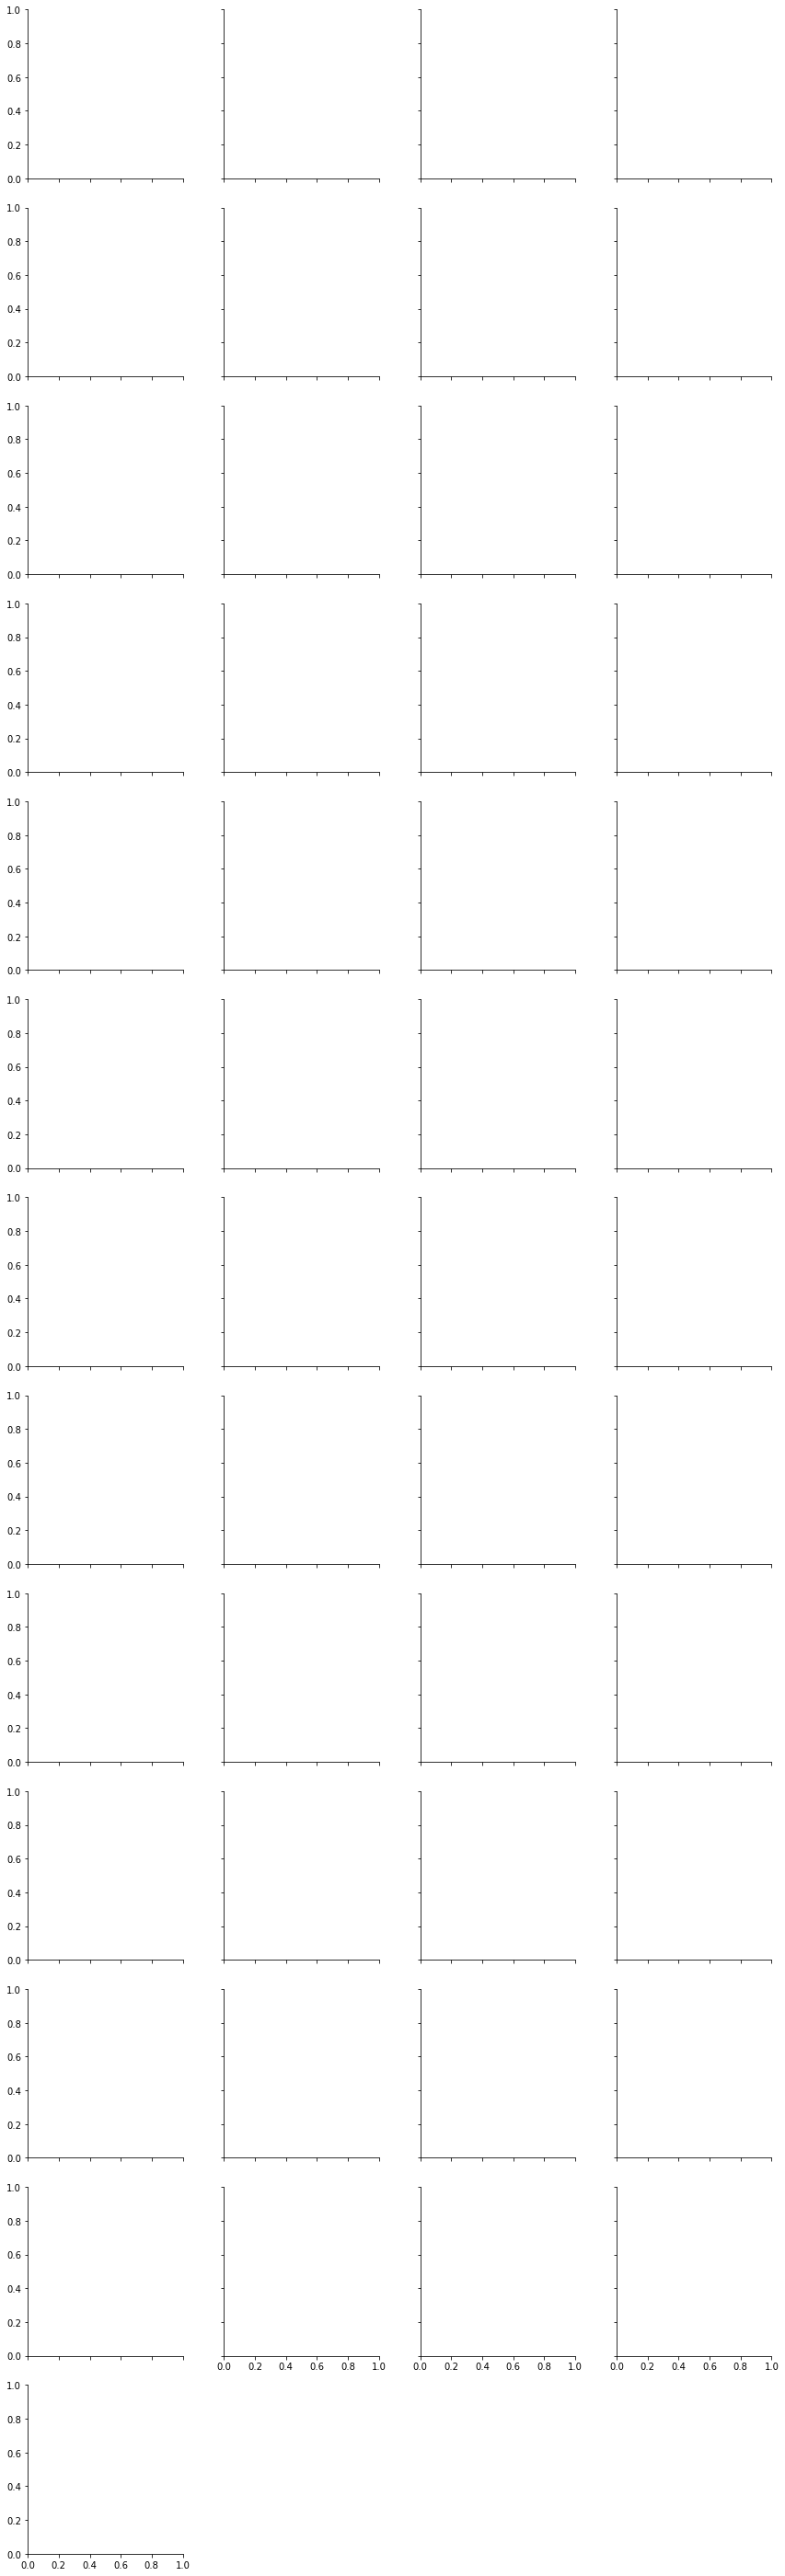

In [12]:
g = sns.FacetGrid(auc_each_tissue[auc_each_tissue['chr']==6], col='tissue', col_wrap=4)
g.map(plt.axhline, y=0.5, ls=":")
g.map(plt.axhline, y=0.7, ls=":")
g.map(plt.axhline, y=0.3, ls=":")
g.map(sns.lineplot, 'diff', "cn_auc")
g.map(sns.lineplot, 'diff', "hi-c_auc", color='red')
for ax in g.axes.flatten():
    ax.set_xlabel('TSS_SNP distance (KB)')
    ax.set_ylabel('AUC')
g.add_legend()